### Neural Network Assignment:

## Problem Statement: Predict the Burned Area of Forest Fire with Neural Networks.

1. The dataset we will be working with is associated with a scientific research paper on predicting the **occurrence of forest fires in Portugal using modeling techniques.**
2. The our focus will not only be about modelling but also on visualizing it. 
3. There will also be exploratory analysis on the data to better understand it and to find any relationships that might be present in it.
4. Below are descriptions of variables in dataset and range of values for each taken from the research paper:

1. X: X-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y: Y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month: Month of the year: 'jan' to 'dec'
4. day: Day of the week: 'mon' to 'sun'
5. FFMC: Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20
6. DMC: Duff Moisture Code index from the FWI system: 1.1 to 291.3
7. DC: Drought Code index from the FWI system: 7.9 to 860.6
8. ISI: Initial Spread Index from the FWI system: 0.0 to 56.10
9. temp: Temperature in Celsius degrees: 2.2 to 33.30
10. RH: Relative humidity in percentage: 15.0 to 100
11. wind: Wind speed in km/h: 0.40 to 9.40
12. rain: Outside rain in mm/m2 : 0.0 to 6.4
13. area: The burned area of the forest (in ha): 0.00 to 1090.84

**Introduction to Neural Networks:**

1. Neural networks also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning (ML) and are heart of deep learning algorithms. 

2. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

3. Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. 

3. Each node, or artificial neuron, connects to another and has an associated weight and threshold. 

4. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.

# 1. Import Libraries:

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot as off

from collections import Counter
sns.set_style('darkgrid')

from imblearn.pipeline import Pipeline
from dataprep.eda import plot, plot_correlation, plot_missing, create_report

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV

In [129]:
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
!pip install keras-tuner --upgrade

# 2. Import Data / Dataset:

In [4]:
forest_fires = pd.read_csv('forestfires.csv')
forest_fires

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [5]:
pd.set_option("display.max_columns", 31)
forest_fires.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0   

   daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  \
0       0       0       0       0       0       0         0         0   
1       0       0       0       0       1       0         0         0   
2       0       1       0       0       0       0         0         0   
3       0       0       0       0       0       0         0         0   
4       0       0       1       0       0       0         0         0   

   monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0         0         0         0         0         0         1         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         1         0   
4         0         0         0         0         0         1         0   

   monthnov  monthoct  monthsep size_category  
0         0         0         0         small  
1         0         1         0         small  
2         0         1         0         small  
3         0         0         0         small  
4         0         0         0         small

# 3. Data understanding / EDA / Feature Engineering:

### 3.1 Binary Classification Task as our classes to predict is 'Yes' or 'No' a Binomial Distribution.

In [6]:
# Printing shape of dataset with rows & columns:

print(forest_fires.shape)
forest_fires.head()

(517, 31)


month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0   

   daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  \
0       0       0       0       0       0       0         0         0   
1       0       0       0       0       1       0         0         0   
2       0       1       0       0       0       0         0         0   
3       0       0       0       0       0       0         0         0   
4       0       0       1       0       0       0         0         0   

   monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0         0         0         0         0         0         1         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         1         0   
4         0         0         0         0         0         1         0   

   monthnov  monthoct  monthsep size_category  
0         0         0         0         small  
1         0         1         0         small  
2         0         1         0         small  
3         0         0         0         small  
4         0         0         0         small

### 3.2 Descriptive Statistics:

In [7]:
forest_fires.describe().T

count        mean         std   min    25%     50%     75%      max
FFMC      517.0   90.644681    5.520111  18.7   90.2   91.60   92.90    96.20
DMC       517.0  110.872340   64.046482   1.1   68.6  108.30  142.40   291.30
DC        517.0  547.940039  248.066192   7.9  437.7  664.20  713.90   860.60
ISI       517.0    9.021663    4.559477   0.0    6.5    8.40   10.80    56.10
temp      517.0   18.889168    5.806625   2.2   15.5   19.30   22.80    33.30
RH        517.0   44.288201   16.317469  15.0   33.0   42.00   53.00   100.00
wind      517.0    4.017602    1.791653   0.4    2.7    4.00    4.90     9.40
rain      517.0    0.021663    0.295959   0.0    0.0    0.00    0.00     6.40
area      517.0   12.847292   63.655818   0.0    0.0    0.52    6.57  1090.84
dayfri    517.0    0.164410    0.371006   0.0    0.0    0.00    0.00     1.00
daymon    517.0    0.143133    0.350548   0.0    0.0    0.00    0.00     1.00
daysat    517.0    0.162476    0.369244   0.0    0.0    0.00    0.00     1.00
daysun    517.0    0.183752    0.387657   0.0    0.0    0.00    0.00     1.00
daythu    517.0    0.117988    0.322907   0.0    0.0    0.00    0.00     1.00
daytue    517.0    0.123791    0.329662   0.0    0.0    0.00    0.00     1.00
daywed    517.0    0.104449    0.306138   0.0    0.0    0.00    0.00     1.00
monthapr  517.0    0.017408    0.130913   0.0    0.0    0.00    0.00     1.00
monthaug  517.0    0.355899    0.479249   0.0    0.0    0.00    1.00     1.00
monthdec  517.0    0.017408    0.130913   0.0    0.0    0.00    0.00     1.00
monthfeb  517.0    0.038685    0.193029   0.0    0.0    0.00    0.00     1.00
monthjan  517.0    0.003868    0.062137   0.0    0.0    0.00    0.00     1.00
monthjul  517.0    0.061896    0.241199   0.0    0.0    0.00    0.00     1.00
monthjun  517.0    0.032882    0.178500   0.0    0.0    0.00    0.00     1.00
monthmar  517.0    0.104449    0.306138   0.0    0.0    0.00    0.00     1.00
monthmay  517.0    0.003868    0.062137   0.0    0.0    0.00    0.00     1.00
monthnov  517.0    0.001934    0.043980   0.0    0.0    0.00    0.00     1.00
monthoct  517.0    0.029014    0.168007   0.0    0.0    0.00    0.00     1.00
monthsep  517.0    0.332689    0.471632   0.0    0.0    0.00    1.00     1.00

In [8]:
forest_fires.T

0      1      2      3      4      5      6      7      8    \
month            mar    oct    oct    mar    mar    aug    aug    aug    sep   
day              fri    tue    sat    fri    sun    sun    mon    mon    tue   
FFMC            86.2   90.6   90.6   91.7   89.3   92.3   92.3   91.5   91.0   
DMC             26.2   35.4   43.7   33.3   51.3   85.3   88.9  145.4  129.5   
DC              94.3  669.1  686.9   77.5  102.2  488.0  495.6  608.2  692.6   
ISI              5.1    6.7    6.7    9.0    9.6   14.7    8.5   10.7    7.0   
temp             8.2   18.0   14.6    8.3   11.4   22.2   24.1    8.0   13.1   
RH                51     33     33     97     99     29     27     86     63   
wind             6.7    0.9    1.3    4.0    1.8    5.4    3.1    2.2    5.4   
rain             0.0    0.0    0.0    0.2    0.0    0.0    0.0    0.0    0.0   
area             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
dayfri             1      0      0      1      0      0      0      0      0   
daymon             0      0      0      0      0      0      1      1      0   
daysat             0      0      1      0      0      0      0      0      0   
daysun             0      0      0      0      1      1      0      0      0   
daythu             0      0      0      0      0      0      0      0      0   
daytue             0      1      0      0      0      0      0      0      1   
daywed             0      0      0      0      0      0      0      0      0   
monthapr           0      0      0      0      0      0      0      0      0   
monthaug           0      0      0      0      0      1      1      1      0   
monthdec           0      0      0      0      0      0      0      0      0   
monthfeb           0      0      0      0      0      0      0      0      0   
monthjan           0      0      0      0      0      0      0      0      0   
monthjul           0      0      0      0      0      0      0      0      0   
monthjun           0      0      0      0      0      0      0      0      0   
monthmar           1      0      0      1      1      0      0      0      0   
monthmay           0      0      0      0      0      0      0      0      0   
monthnov           0      0      0      0      0      0      0      0      0   
monthoct           0      1      1      0      0      0      0      0      0   
monthsep           0      0      0      0      0      0      0      0      1   
size_category  small  small  small  small  small  small  small  small  small   

                 9      10     11     12     13     14   ...    502    503  \
month            sep    sep    sep    aug    sep    sep  ...    aug    aug   
day              sat    sat    sat    fri    mon    wed  ...    tue    wed   
FFMC            92.5   92.5   92.8   63.5   90.9   92.9  ...   96.1   94.5   
DMC             88.0   88.0   73.2   70.8  126.5  133.3  ...  181.1  139.4   
DC             698.6  698.6  713.0  665.3  686.5  699.6  ...  671.2  689.1   
ISI              7.1    7.1   22.6    0.8    7.0    9.2  ...   14.3   20.0   
temp            22.8   17.8   19.3   17.0   21.3   26.4  ...   20.7   29.2   
RH                40     51     38     72     42     21  ...     69     30   
wind             4.0    7.2    4.0    6.7    2.2    4.5  ...    4.9    4.9   
rain             0.0    0.0    0.0    0.0    0.0    0.0  ...    0.4    0.0   
area             0.0    0.0    0.0    0.0    0.0    0.0  ...    0.0   1.95   
dayfri             0      0      0      1      0      0  ...      0      0   
daymon             0      0      0      0      1      0  ...      0      0   
daysat             1      1      1      0      0      0  ...      0      0   
daysun             0      0      0      0      0      0  ...      0      0   
daythu             0      0      0      0      0      0  ...      0      0   
daytue             0      0      0      0      0      0  ...      1      0   
daywed             0      0      0      0      0    

In [9]:
forest_fires.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [10]:
forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [11]:
forest_fires.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [12]:
forest_fires[forest_fires.duplicated()]

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  \
53    aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00       0   
100   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00       0   
215   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66       0   
303   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00       1   
426   aug  thu  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0   0.00       0   
461   aug  sat  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0   0.00       0   
501   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00       0   
508   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0   0.00       1   

     daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  \
53        0       0       0       0       0       1         0         1   
100       0       0       1       0       0       0         0         1   
215       0       1       0       0       0       0         0         0   
303       0       0       0       0       0       0         0         0   
426       0       0       0       1       0       0         0         1   
461       0       1       0       0       0       0         0         1   
501       0       0       0       0       1       0         0         1   
508       0       0       0       0       0       0         0         1   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
53          0         0         0         0         0         0         0   
100         0         0         0         0         0         0         0   
215         0         0         0         0         0         1         0   
303         0         0         0         0         1         0         0   
426         0         0         0         0         0         0         0   
461         0         0         0         0         0         0         0   
501         0         0         0         0         0         0         0   
508         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep size_category  
53          0         0         0         small  
100         0         0         0         small  
215         0         0         0         large  
303         0         0         0         small  
426         0         0         0         small  
461         0         0         0         small  
501         0         0         0         small  
508         0         0         0         small

In [13]:
forest_fires[forest_fires.duplicated()].shape

(8, 31)

### 3.3 Types of variables:

#### Numerical Variables:

In [14]:
# List of Numerical Variables:

numerical_features=[feature for feature in forest_fires.columns if forest_fires[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables:

forest_fires[numerical_features].head()

Number of numerical variables: 28


FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  daymon  daysat  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1       0       0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0       0       0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0       0       1   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1       0       0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0       0       0   

   daysun  daythu  daytue  daywed  monthapr  monthaug  monthdec  monthfeb  \
0       0       0       0       0         0         0         0         0   
1       0       0       1       0         0         0         0         0   
2       0       0       0       0         0         0         0         0   
3       0       0       0       0         0         0         0         0   
4       1       0       0       0         0         0         0         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  
0         0  
1         0  
2         0  
3         0  
4         0

####  Discrete Feature:

Numerical variables are usually of 2 types:

  1. Continuous variable and 
  1. Discrete variable

In [15]:
discrete_feature=[feature for feature in numerical_features if len(forest_fires[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 21


#### 1. Continuous Variable:

In [16]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


#### 2.Categorical Variables:

In [63]:
categorical = [var for var in forest_fires.columns if forest_fires[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 2 categorical variables

The categorical variables are :

 ['month', 'day']


#### Frequency counts of categorical variables:

In [18]:
# View the frequency counts of values in categorical variables:

for var in categorical: 
    
    print(forest_fires[var].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
small    378
large    139
Name: size_category, dtype: int64


In [19]:
# View the frequency distribution of categorical variables:

for var in categorical: 
    
    print(forest_fires[var].value_counts()/np.float(len(forest_fires)))

aug    0.355899
sep    0.332689
mar    0.104449
jul    0.061896
feb    0.038685
jun    0.032882
oct    0.029014
apr    0.017408
dec    0.017408
jan    0.003868
may    0.003868
nov    0.001934
Name: month, dtype: float64
sun    0.183752
fri    0.164410
sat    0.162476
mon    0.143133
tue    0.123791
thu    0.117988
wed    0.104449
Name: day, dtype: float64
small    0.731141
large    0.268859
Name: size_category, dtype: float64


### Number of Labels: Cardinality 

1. The number of labels within a categorical variable is known as cardinality. 
2. A high number of labels within a variable is known as high cardinality. 
3. High cardinality may pose some serious problems in the machine learning model. 
4. So, we will check for the high cardinality.

In [20]:
# check for cardinality in categorical variables:

for var in categorical:
    
    print(var, ' contains ', len(forest_fires[var].unique()), ' labels')

month  contains  12  labels
day  contains  7  labels
size_category  contains  2  labels


**From above results, We can see that none of the column contains relatively large number of labels.**

In [21]:
forest_fires.corr()

FFMC       DMC        DC       ISI      temp        RH  \
FFMC      1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995   
DMC       0.382619  1.000000  0.682192  0.305128  0.469594  0.073795   
DC        0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192   
ISI       0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517   
temp      0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390   
RH       -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000   
wind     -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410   
rain      0.056702  0.074790  0.035861  0.067668  0.069491  0.099751   
area      0.040122  0.072994  0.049383  0.008258  0.097844 -0.075519   
dayfri    0.019306 -0.012010 -0.004220  0.046695 -0.071949  0.064506   
daymon   -0.059396 -0.107921 -0.052993 -0.158601 -0.136529  0.009376   
daysat   -0.019637 -0.003653 -0.035189 -0.038585  0.034899 -0.023869   
daysun   -0.089517  0.025355 -0.001431 -0.003243  0.014403  0.136220   
daythu    0.071730  0.087672  0.051859 -0.022406  0.051432 -0.123061   
daytue    0.011225  0.000016  0.028368  0.068610  0.035630 -0.014211   
daywed    0.093908  0.017939  0.024803  0.125415  0.090580 -0.087508   
monthapr -0.117199 -0.197543 -0.268211 -0.106478 -0.157051  0.021235   
monthaug  0.228103  0.497928  0.279361  0.334639  0.351404  0.054761   
monthdec -0.137044 -0.176301 -0.105642 -0.162322 -0.329648 -0.047714   
monthfeb -0.281535 -0.317899 -0.399277 -0.249777 -0.320015  0.140430   
monthjan -0.454771 -0.105647 -0.115064 -0.103588 -0.146520  0.170923   
monthjul  0.031833 -0.001946 -0.100887  0.020982  0.142588  0.013185   
monthjun -0.040634 -0.050403 -0.186183  0.111516  0.051015  0.009382   
monthmar -0.074327 -0.407404 -0.650427 -0.143520 -0.341797 -0.089836   
monthmay -0.037230 -0.081980 -0.114209 -0.060493 -0.045540  0.086822   
monthnov -0.088964 -0.074218 -0.078380 -0.076559 -0.053798 -0.035885   
monthoct -0.005998 -0.187632  0.093279 -0.071154 -0.053513 -0.072334   
monthsep  0.076609  0.110907  0.531857 -0.068877  0.088006 -0.062596   

              wind      rain      area    dayfri    daymon    daysat  \
FFMC     -0.028485  0.056702  0.040122  0.019306 -0.059396 -0.019637   
DMC      -0.105342  0.074790  0.072994 -0.012010 -0.107921 -0.003653   
DC       -0.203466  0.035861  0.049383 -0.004220 -0.052993 -0.035189   
ISI       0.106826  0.067668  0.008258  0.046695 -0.158601 -0.038585   
temp     -0.227116  0.069491  0.097844 -0.071949 -0.136529  0.034899   
RH        0.069410  0.099751 -0.075519  0.064506  0.009376 -0.023869   
wind      1.000000  0.061119  0.012317  0.118090 -0.063881 -0.063799   
rain      0.061119  1.000000 -0.007366 -0.004261 -0.029945 -0.032271   
area      0.012317 -0.007366  1.000000 -0.052911 -0.021206  0.087868   
dayfri    0.118090 -0.004261 -0.052911  1.000000 -0.181293 -0.195372   
daymon   -0.063881 -0.029945 -0.021206 -0.181293  1.000000 -0.180015   
daysat   -0.063799 -0.032271  0.087868 -0.195372 -0.180015  1.000000   
daysun    0.027981 -0.017872 -0.020463 -0.210462 -0.193919 -0.208978   
daythu   -0.062553 -0.026798  0.020121 -0.162237 -0.149485 -0.161094   
daytue    0.053396  0.139311 -0.001333 -0.166728 -0.153623 -0.165553   
daywed   -0.019965 -0.020744 -0.011452 -0.151487 -0.139579 -0.150419   
monthapr  0.048266 -0.009752 -0.008280 -0.019140 -0.012171 -0.018534   
monthaug  0.028577  0.093101 -0.004187 -0.100837 -0.130774 -0.009808   
monthdec  0.269702 -0.009752  0.001010 -0.019140  0.114519 -0.058625   
monthfeb -0.029431 -0.014698 -0.020732  0.046323  0.003933  0.020406   
monthjan -0.070245 -0.004566 -0.012589 -0.027643 -0.025470  0.057019   
monthjul -0.040645 -0.013390  0.006149 -0.048969 -0.013300  0.060945   
monthjun  0.012124 -0.013510 -0.020314  0.006000  0.017553 -0.022408   
monthmar  0.181433 -0.020744 -0.045596  0.036205  0.077125  0.021024   
monthmay  0.015054 -0.004566  0.006264  0.056423 -0.025470  0.057019   
monthnov  0.011864 -0.003225 -0.008893 -0.019527 -0.0

# 4. Data Visualization:

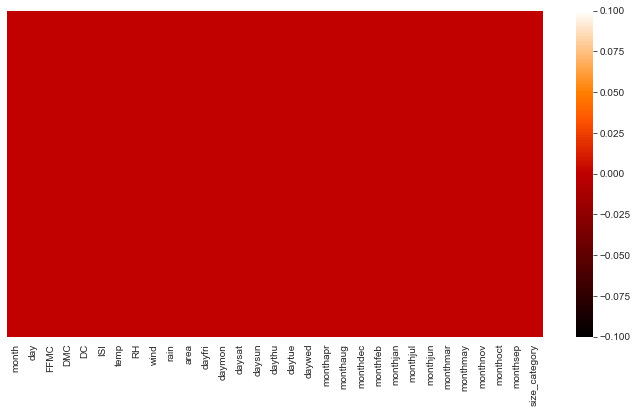

In [22]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(forest_fires.isna(), cmap =('gist_heat'), yticklabels=False)
plt.show()

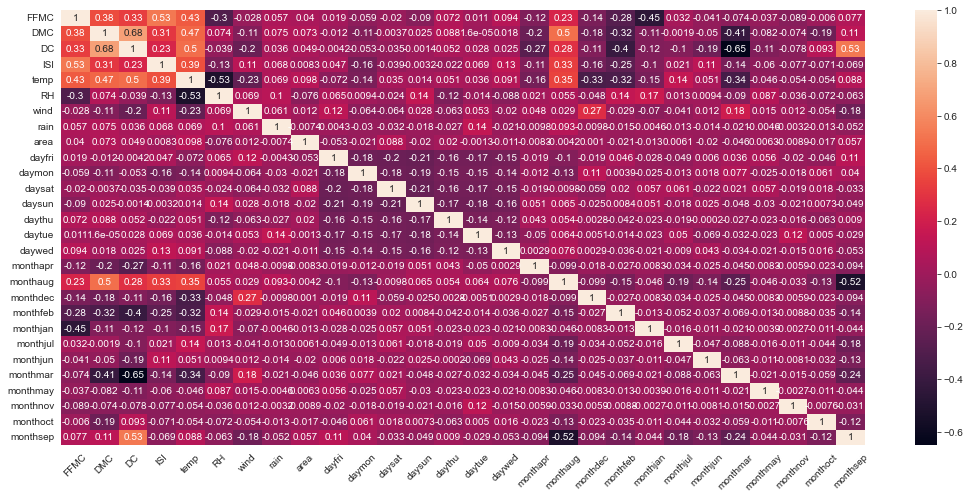

In [23]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(forest_fires.corr(), annot=True);
plt.xticks(rotation=45)
plt.show()

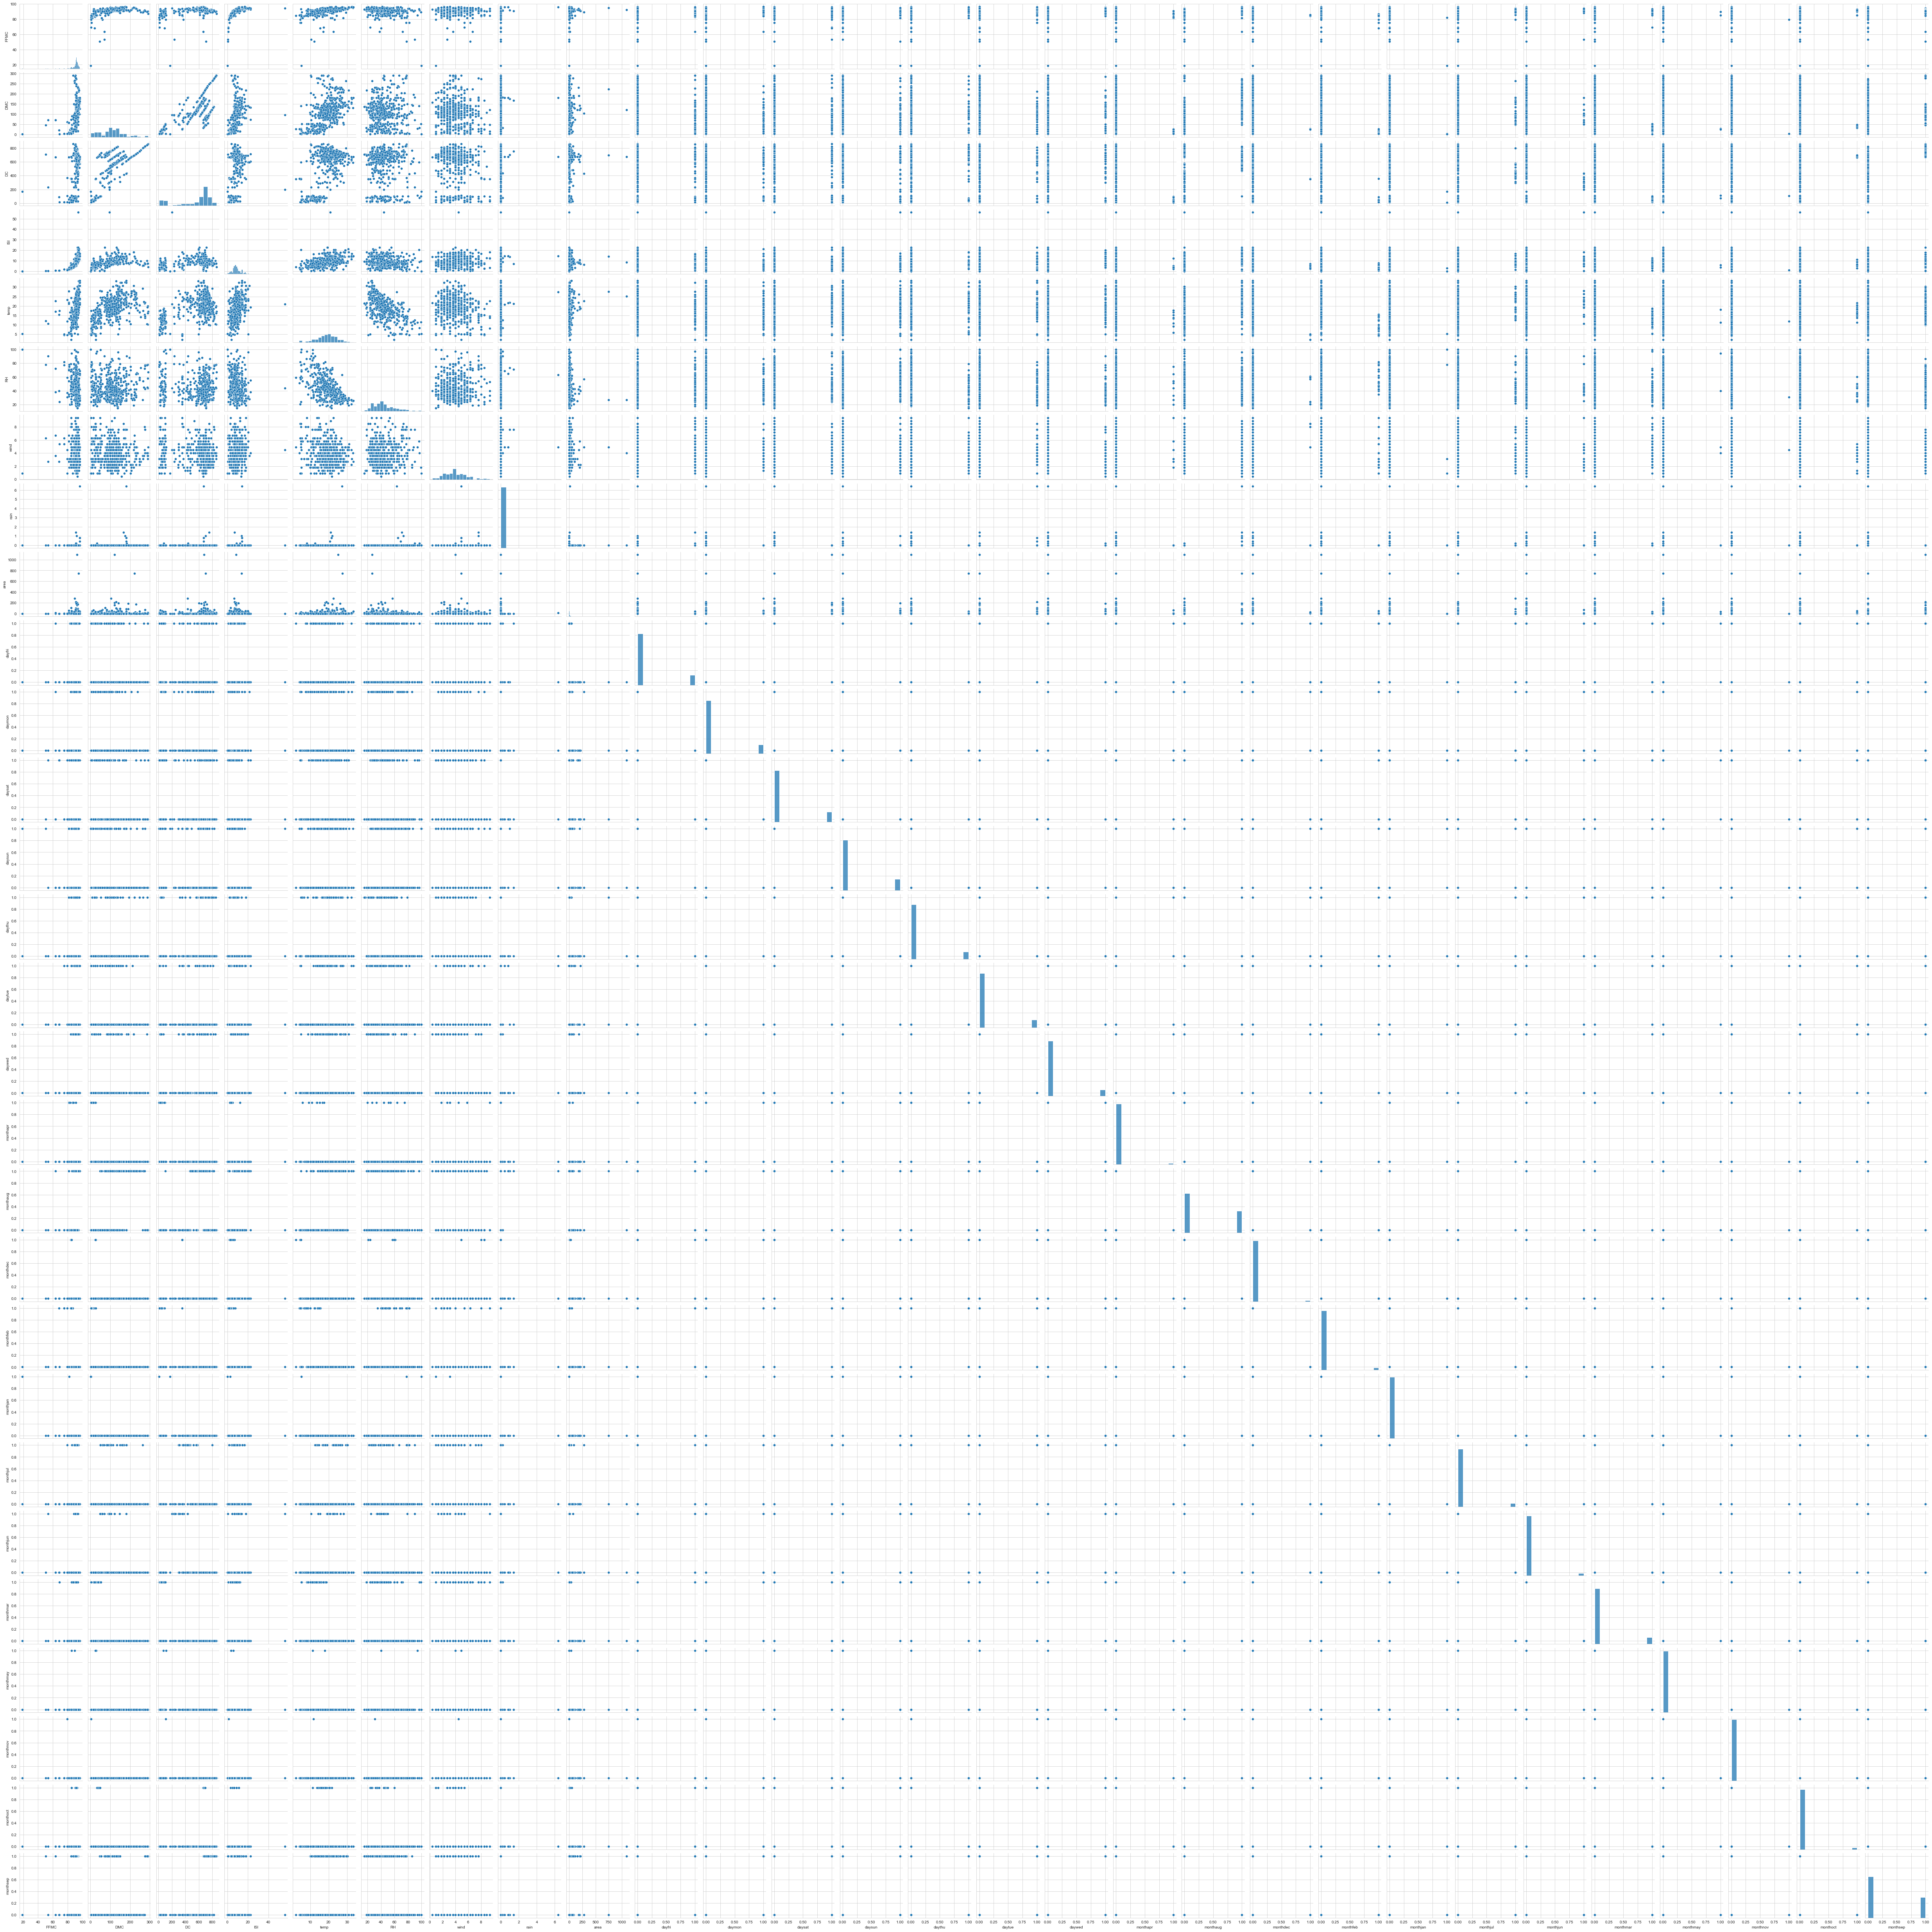

In [53]:
sns.set_style('whitegrid')
sns.pairplot(forest_fires[numerical_features])
plt.show()

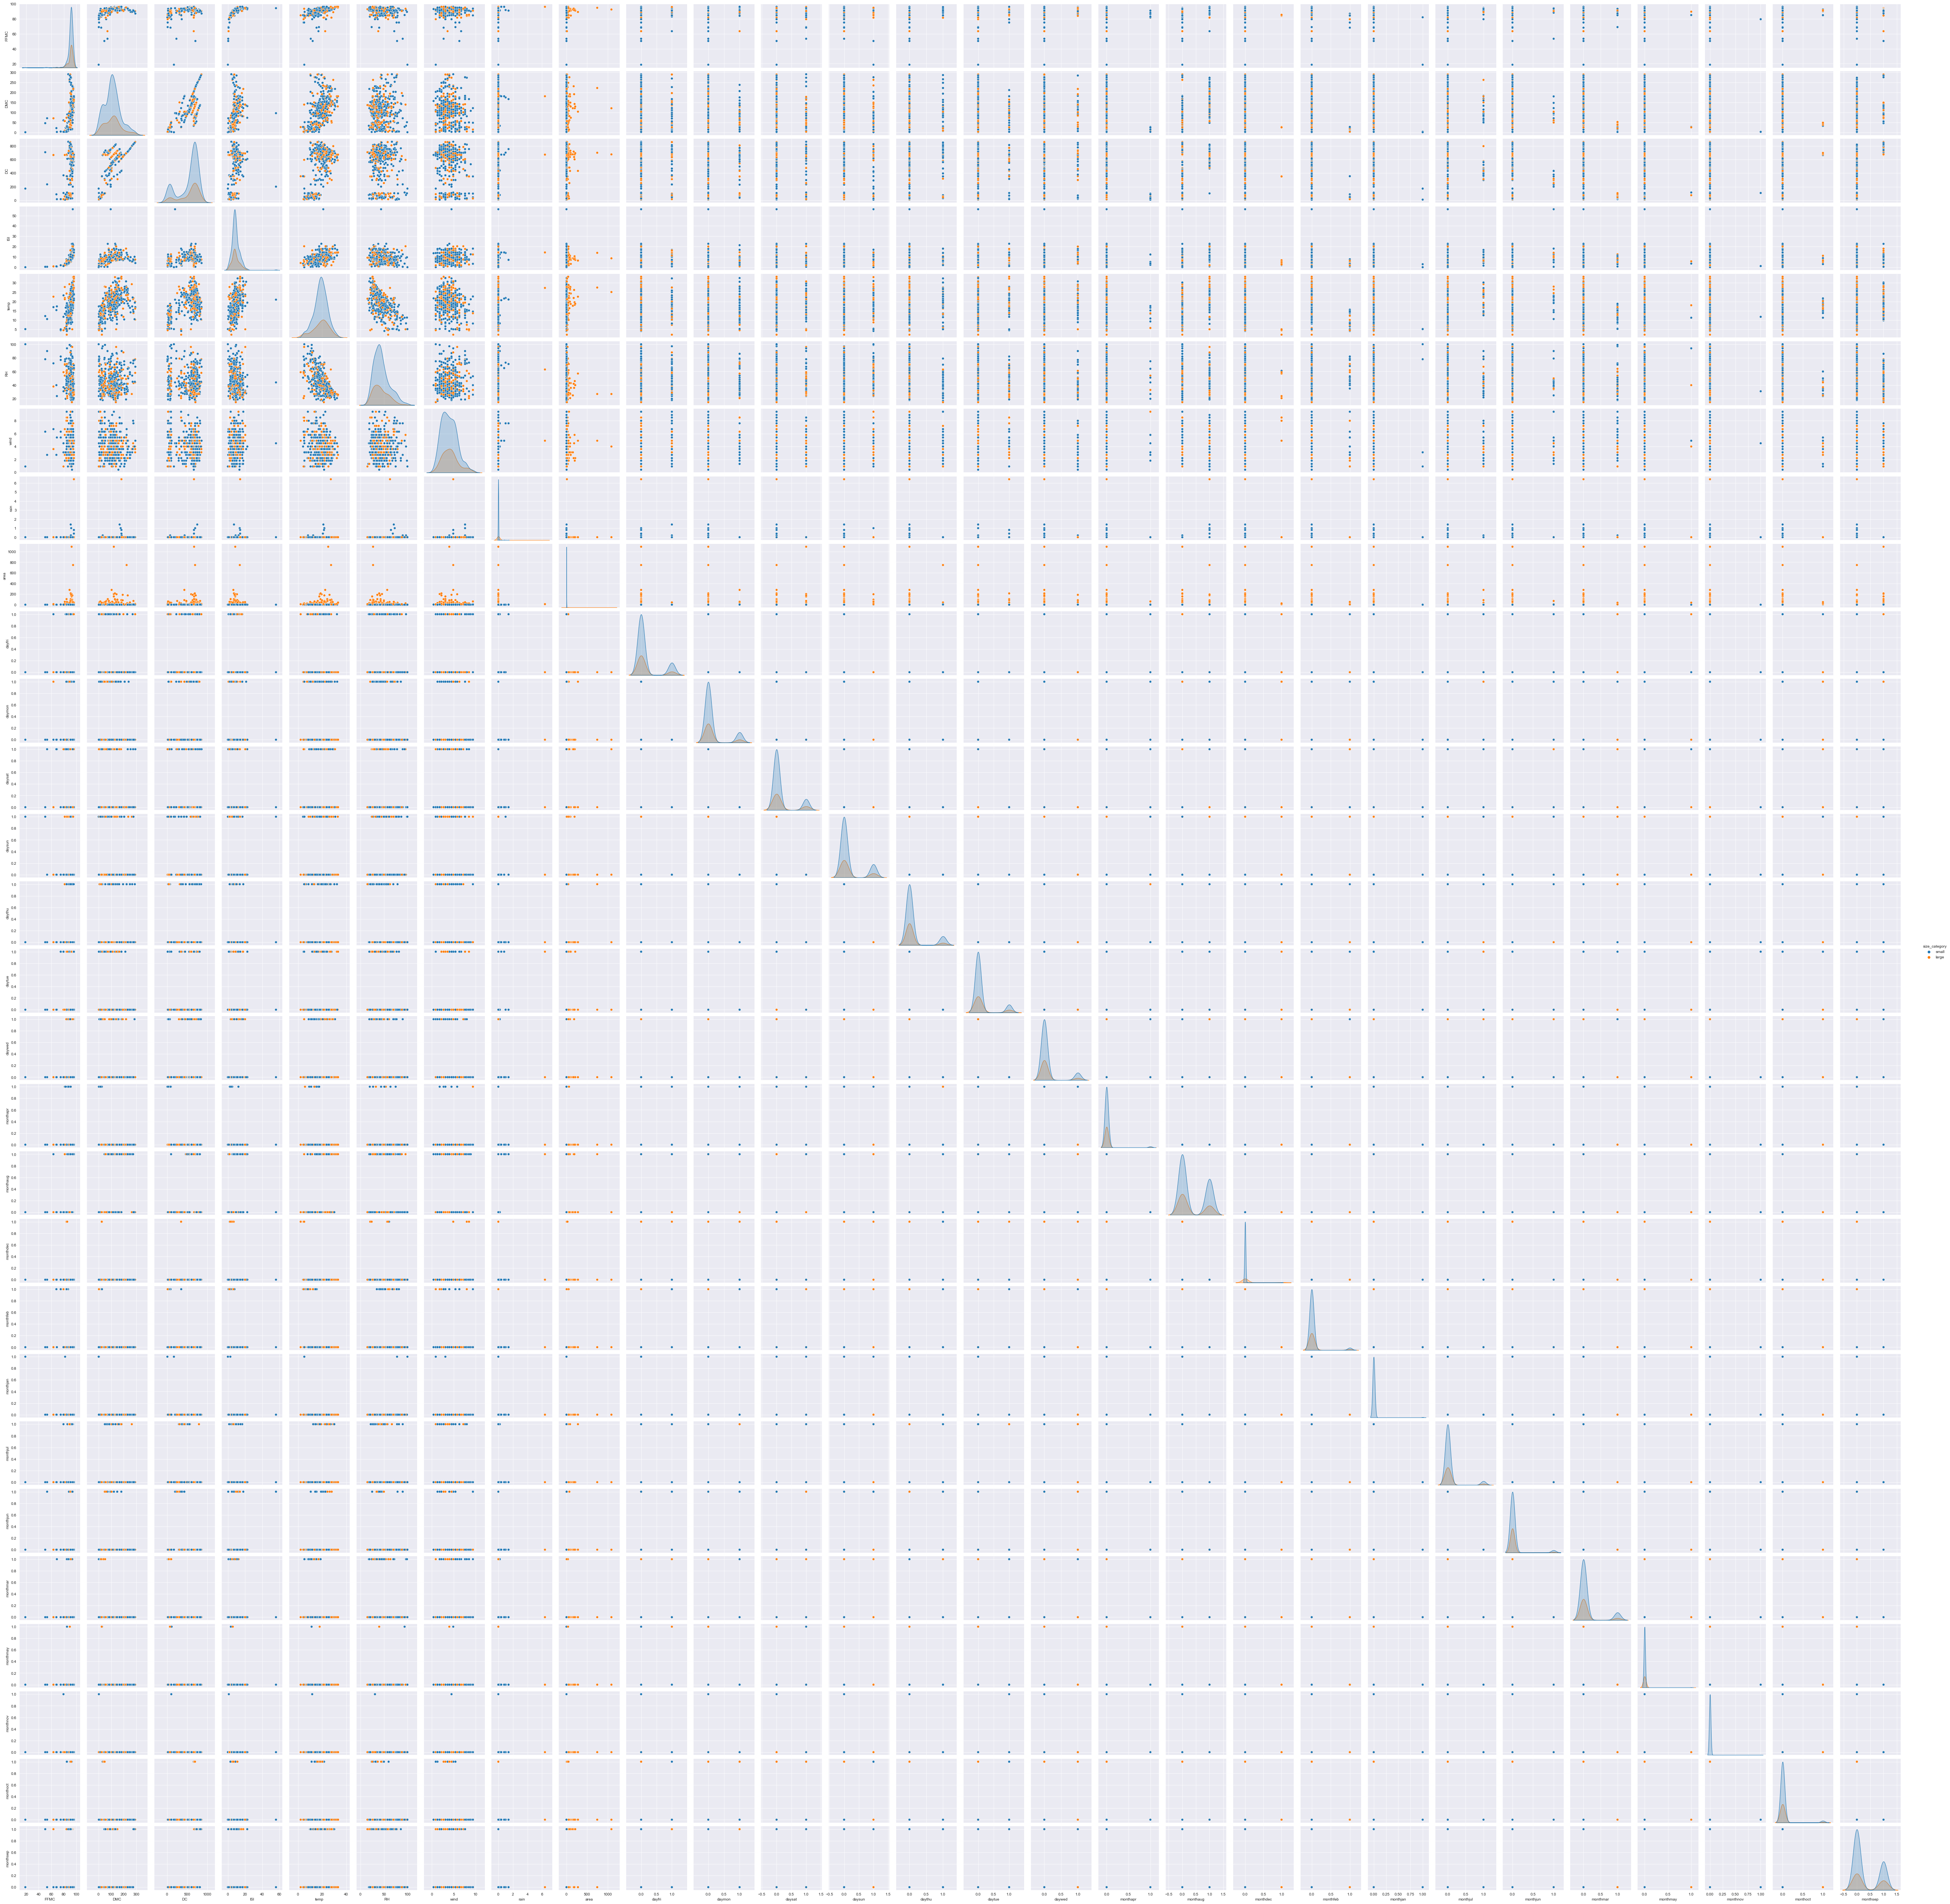

In [24]:
sns.set_style('darkgrid')
sns.pairplot(forest_fires, hue='size_category')
plt.show()

In [26]:
#Target variable:

y_count = forest_fires.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})

size_category  counts
0         small     378
1         large     139

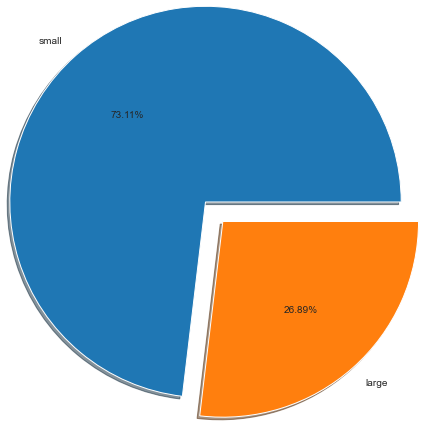

In [27]:
plt.pie(y_count.counts, labels=y_count['size_category'], shadow = True, autopct='%1.2f%%', explode=(0,0.2), radius=1.5)
y_count

In [28]:
# Other features with target variable: 

month_df = forest_fires.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_df.head(10)

size_category month  count
11         small   aug    141
21         small   sep    121
9          large   sep     51
1          large   aug     43
17         small   mar     42
15         small   jul     23
16         small   jun     14
13         small   feb     14
6          large   mar     12
20         small   oct     11

Text(0.5, 1.02, 'Num of fires in each month')

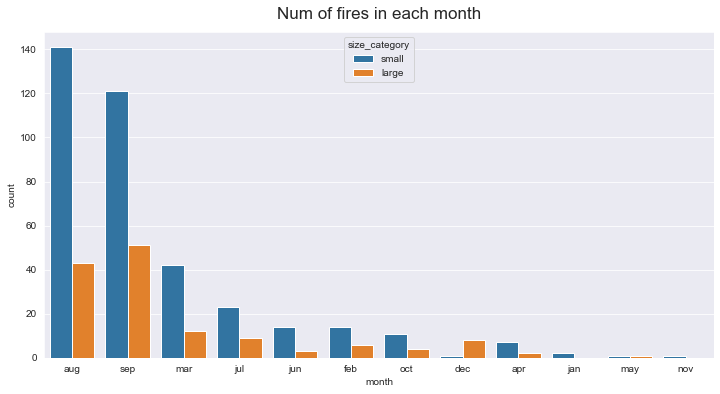

In [29]:
sns.barplot(x='month', y = 'count', hue='size_category', data=month_df)
plt.title("Num of fires in each month", fontsize=17, y=1.02)

**Observation:**

1. Aug month has seen highest number of small fires.
2. Sep month has seen highest num of large fires.
3. Least num of fires occured in month of Nov.

In [30]:
day_df = forest_fires.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_df

size_category  day  count
10         small  sun     68
7          small  fri     64
9          small  sat     58
8          small  mon     55
11         small  thu     48
12         small  tue     44
13         small  wed     41
3          large  sun     27
2          large  sat     26
0          large  fri     21
5          large  tue     20
1          large  mon     19
4          large  thu     13
6          large  wed     13

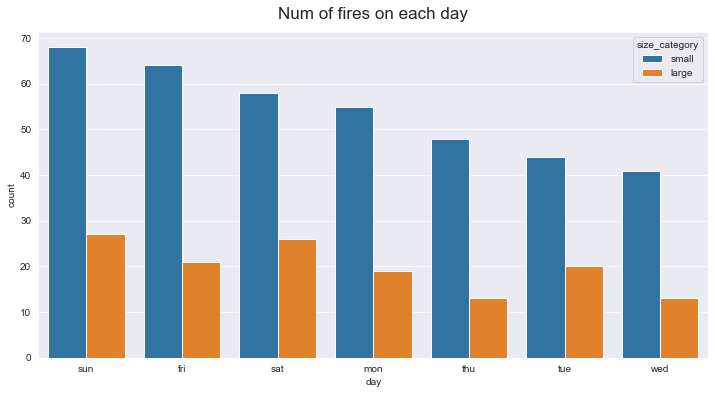

In [31]:
sns.barplot(x='day', y = 'count', hue='size_category', data=day_df)
plt.title("Num of fires on each day", fontsize=17, y=1.02)
plt.show()

**Observation:**

1. Highest num of small as well as large fires have occured on a Sunday.
2. Lowest num of small fires have occured on a Wednesday.
3. Lowest num of large fires have occured on a Wednesday and Thursday.

## Label Encoder:

In [32]:
labelencoder = LabelEncoder()
forest_fires.iloc[:, -1] = labelencoder.fit_transform(forest_fires.iloc[:,-1])
forest_fires['size_category']                                                 #1 for small, 0 for large

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [33]:
rain_df = forest_fires.groupby(['size_category', 'rain']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
rain_df

size_category  rain  count
2              1   0.0    371
0              0   0.0    138
3              1   0.2      2
5              1   0.8      2
1              0   6.4      1
4              1   0.4      1
6              1   1.0      1
7              1   1.4      1

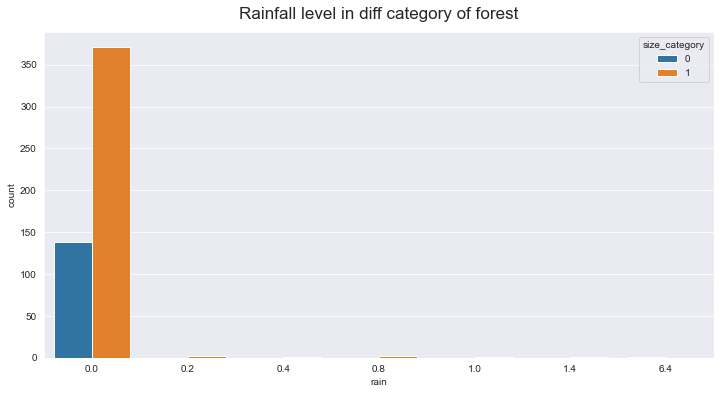

In [34]:
sns.barplot(x='rain', y='count', hue='size_category', data=rain_df)
plt.title("Rainfall level in diff category of forest", y=1.02, fontsize=17)
plt.show()

**Observation:**

1. 0 represents large forest fire, 1 represents small forest fire.
2. Majority of the forests have almost no rainfall.
3. Highest rainfall a forest has was of 6.4 and it comes under a large forest fire catogory.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



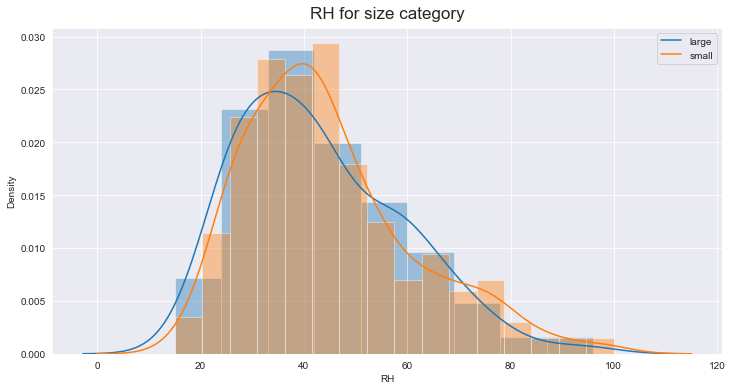

In [35]:
sns.distplot(forest_fires[forest_fires['size_category']==0]['RH'])  # Orange for small fire, Blue for small fire:
sns.distplot(forest_fires[forest_fires['size_category']==1]['RH'])                 
plt.title("RH for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

### Obervations:

1. Fairly normal data.
2. We will have to check for outliers with diff method.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



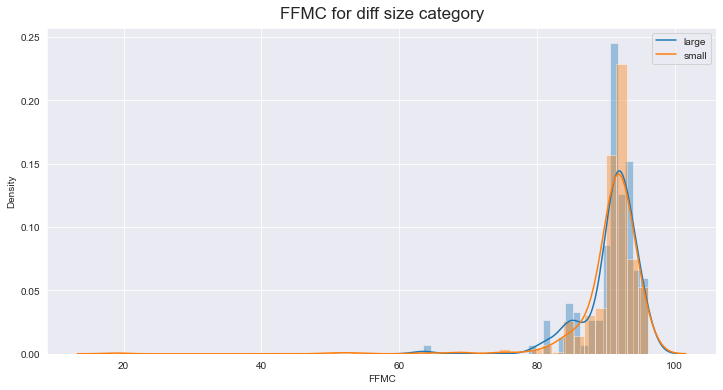

In [36]:
sns.distplot(forest_fires[forest_fires['size_category']==0]['FFMC'])  # Orange for small fire, Blue for small fire
sns.distplot(forest_fires[forest_fires['size_category']==1]['FFMC'])                 
plt.title("FFMC for diff size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)
plt.show()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

### Obervations:

1. Highly skewed data.
2. There are definitly outliers in this variable.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



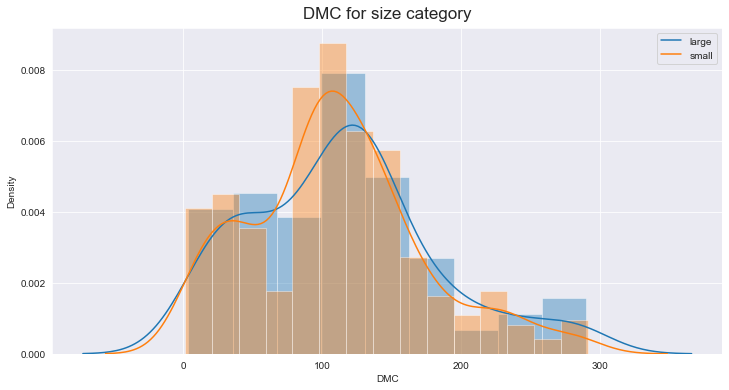

In [38]:
sns.distplot(forest_fires[forest_fires['size_category']==0]['DMC'])
sns.distplot(forest_fires[forest_fires['size_category']==1]['DMC'])               
plt.title("DMC for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



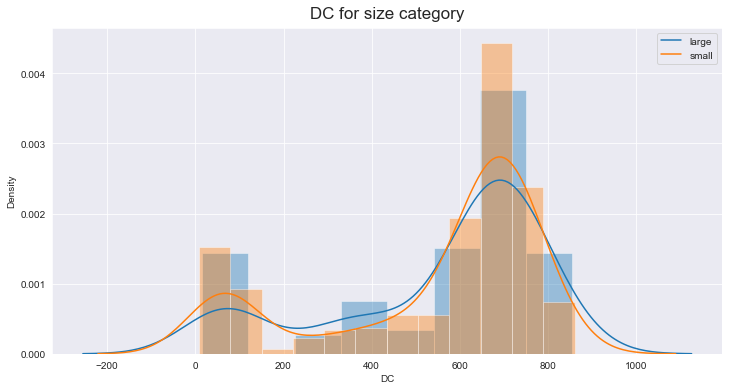

In [39]:
sns.distplot(forest_fires[forest_fires['size_category']==0]['DC'])
sns.distplot(forest_fires[forest_fires['size_category']==1]['DC'])                 
plt.title("DC for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

### Observations:

1. Highly skewed data.
2. Outliers are present.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



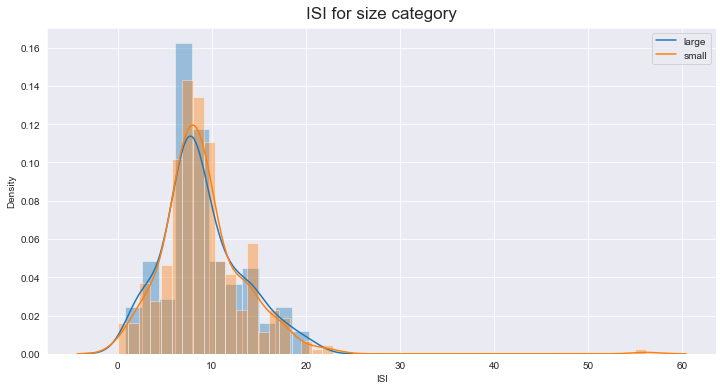

In [40]:
sns.distplot(forest_fires[forest_fires['size_category']==0]['ISI'])
sns.distplot(forest_fires[forest_fires['size_category']==1]['ISI'])                 
plt.title("ISI for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



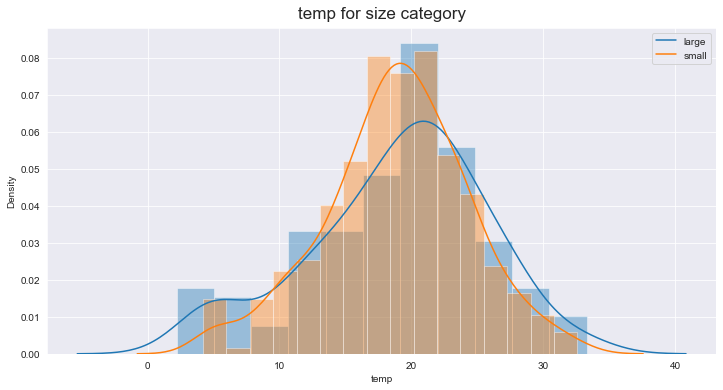

In [41]:
sns.distplot(forest_fires[forest_fires['size_category']==0]['temp'])
sns.distplot(forest_fires[forest_fires['size_category']==1]['temp'])               
plt.title("temp for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

### Observations:

1. Fairly Normal distribution.
2. Large forest fire has slighly higher temp than small forest fires.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



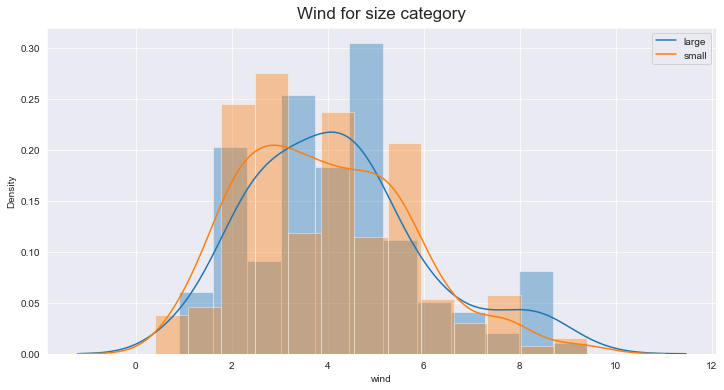

In [42]:
sns.distplot(forest_fires[forest_fires['size_category']==0]['wind'])
sns.distplot(forest_fires[forest_fires['size_category']==1]['wind'])                 
plt.title("Wind for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



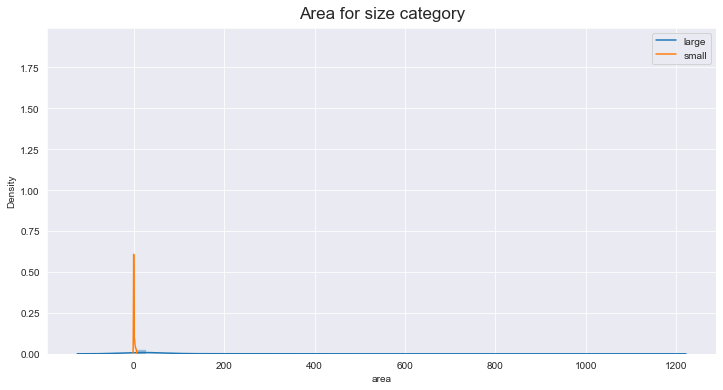

In [43]:
sns.distplot(forest_fires[forest_fires['size_category']==0]['area'])
sns.distplot(forest_fires[forest_fires['size_category']==1]['area'])                
plt.title("Area for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

1. Large the forest area, larger the fire. 
2. So, we can see, area large area forest are coming under large forest fire category.

In [ ]:
categorical_features = forest.describe(include=["object"]).columns

print(list(categorical_features))

['month', 'day', 'size_category']


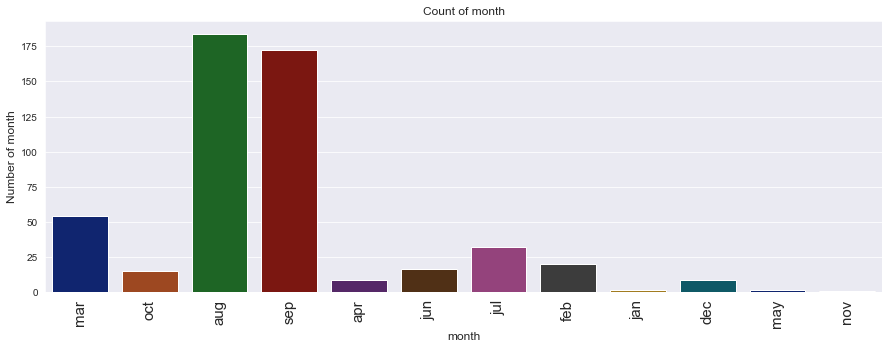

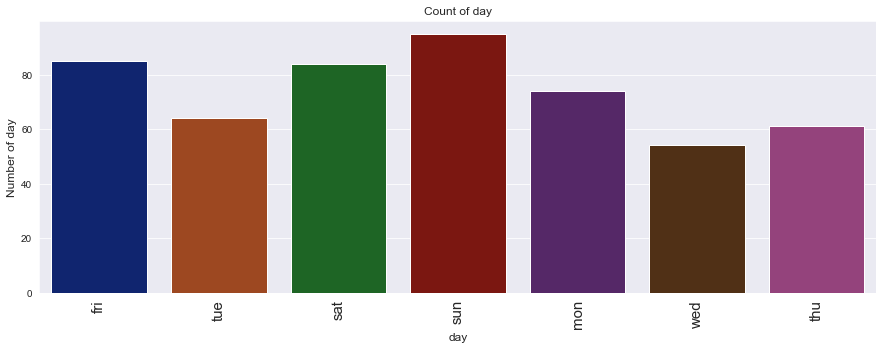

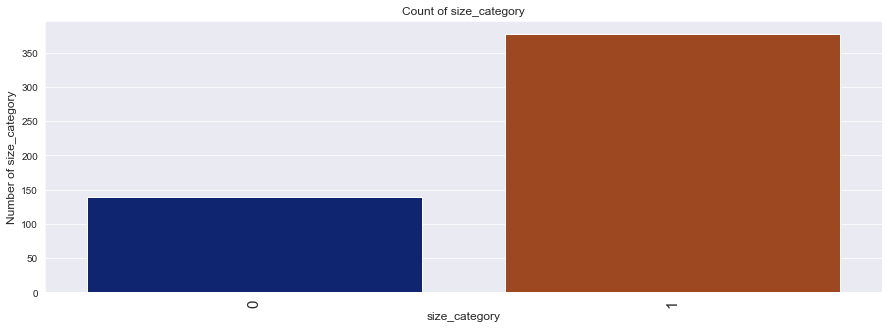

In [45]:
print(categorical)



for idx, column in enumerate(categorical):
    plt.figure(figsize=(15, 5))
    df = forest_fires.copy()
    unique = df[column].value_counts(ascending=True);
 
    #plt.subplot(1, len(categorical_features), idx+1):
    
    plt.title("Count of "+ column)
    sns.countplot(data=forest_fires, x=column, palette = "dark")
    
    #plt.bar(unique.index, unique.values):
    
    plt.xticks(rotation = 90, size = 15)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
    plt.show()

### 4.1 Univariate plots:
    
Lets analyze the continuous values by creating histograms to understand the distribution of the numerical features

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



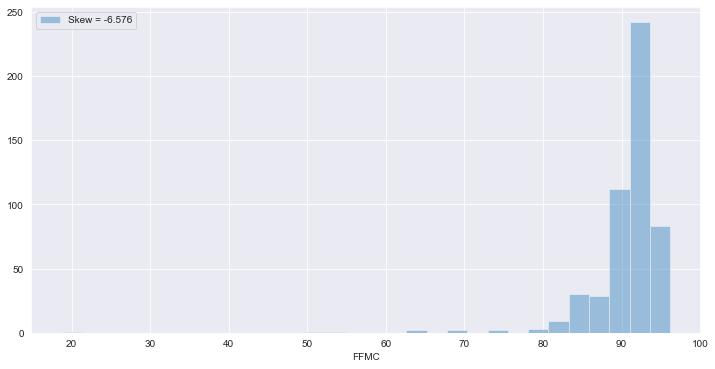

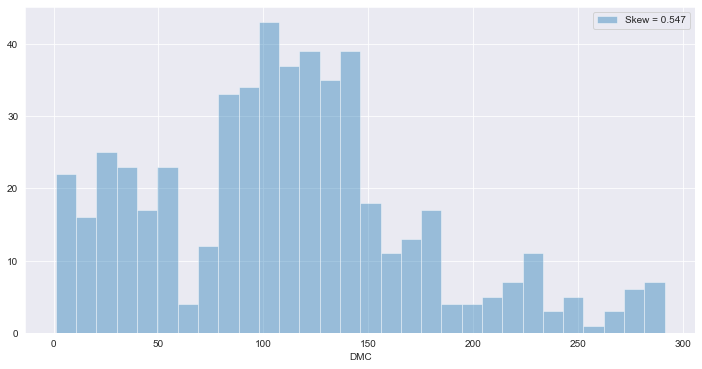

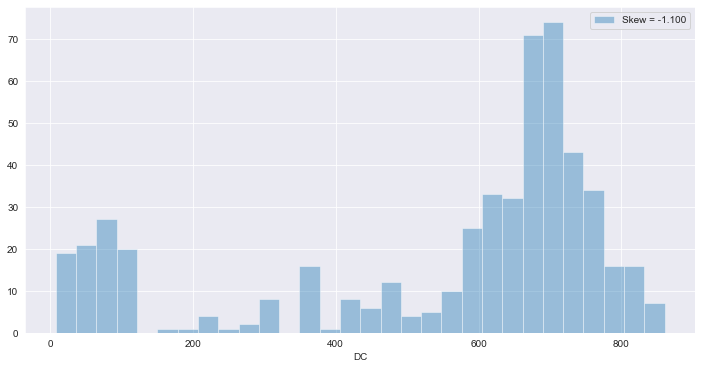

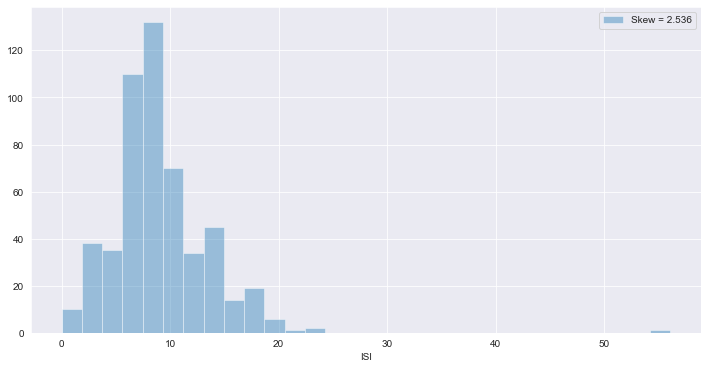

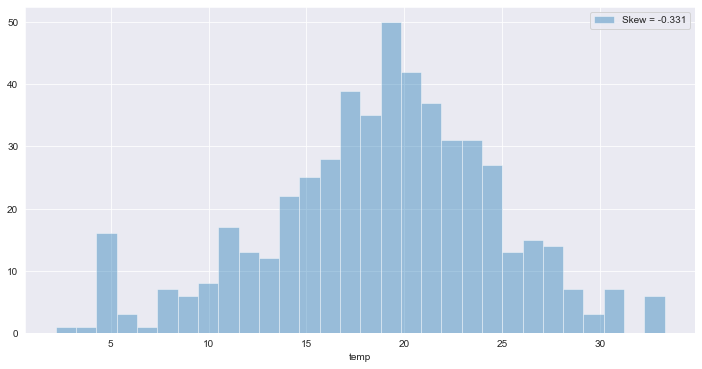

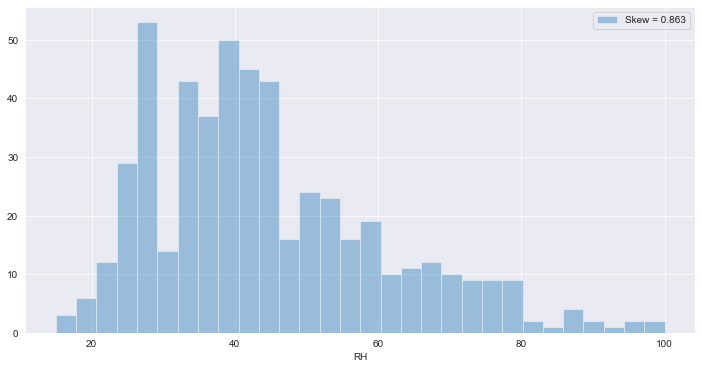

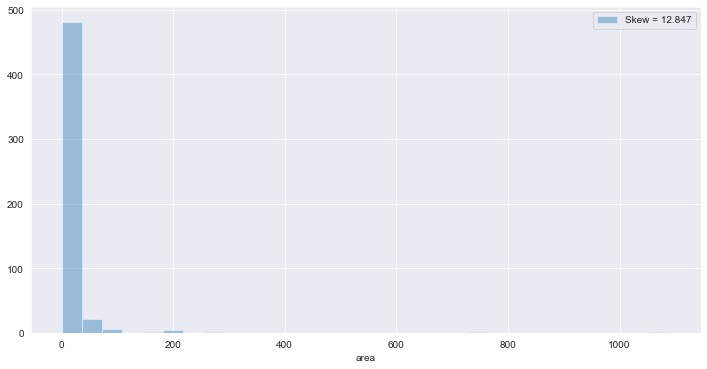

In [25]:
for feat in continuous_feature:
    skew = forest_fires[feat].skew()
    sns.distplot(forest_fires[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [48]:
# Detect observations with more than one outlier

def outlier_hunt(forest_fires):
    """
    Takes a dataframe forest_fires of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns):
    
    for col in forest_fires.columns.tolist():
        
        # 1st quartile (25%):
        Q1 = np.percentile(forest_fires[col], 25)
        
        # 3rd quartile (75%):
        Q3 = np.percentile(forest_fires[col],75)
        
        # Interquartile rrange (IQR):
        IQR = Q3 - Q1
        
        # Outlier step:
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col:
        
        outlier_list_col = forest_fires[(forest_fires[col] < Q1 - outlier_step) | (forest_fires[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices:
        
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers:
    
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(forest_fires[continuous_feature]))))

The dataset contains 3 observations with more than 2 outliers


#### There exists some 3 observations with multiple outliers. These could harm the efficiency of our learning algorithms. We'll make sure to get rid of these in the next sections.

1. Let's examine the boxplots for the several distributions

In [49]:
continuous_feature

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'area']

### 4.2 Outliers Detection:

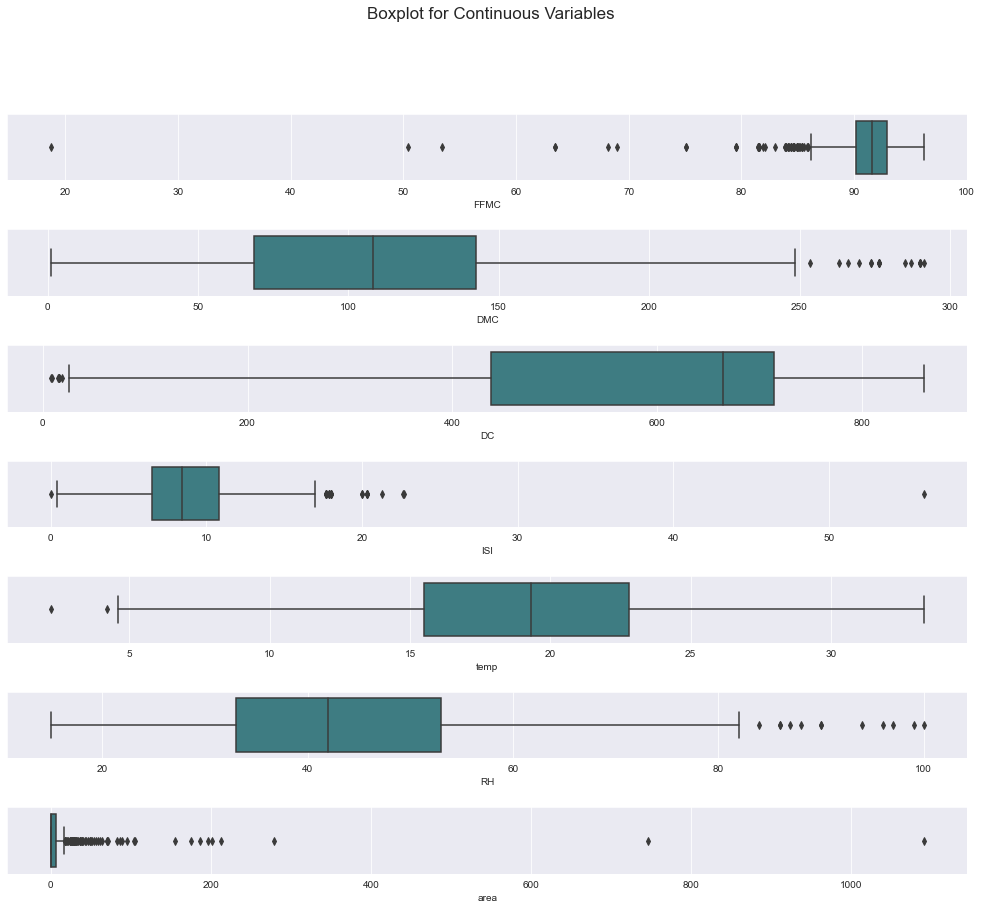

In [50]:
outliers=forest_fires.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=outliers,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=outliers,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=outliers,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=outliers,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=outliers,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=outliers,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=outliers,palette='crest',ax=axes[6])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

**Observations:** Again we observed a very noisy data.

There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building.

### After Log-Transformation:

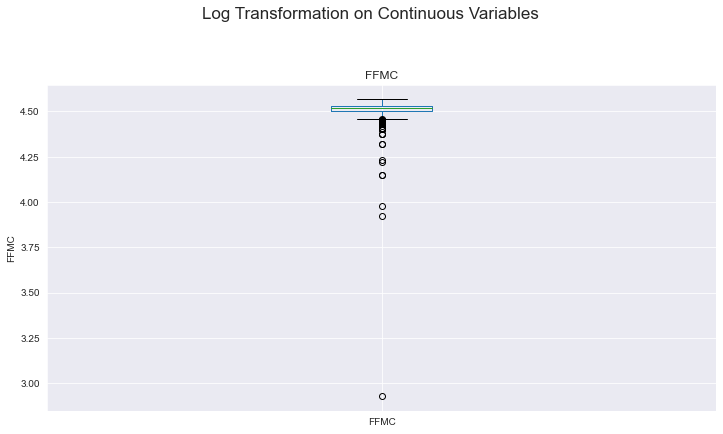

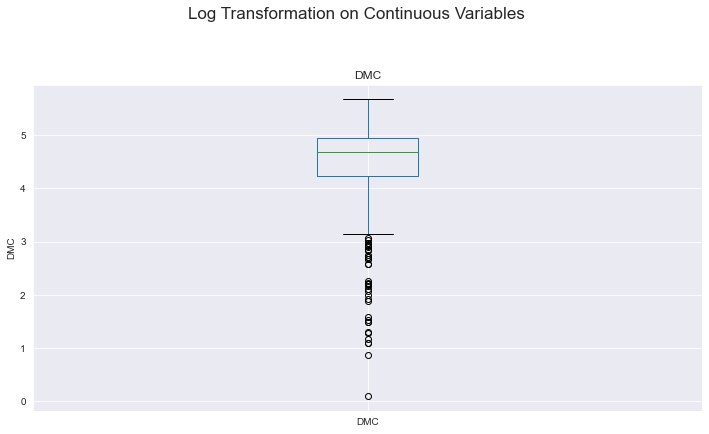

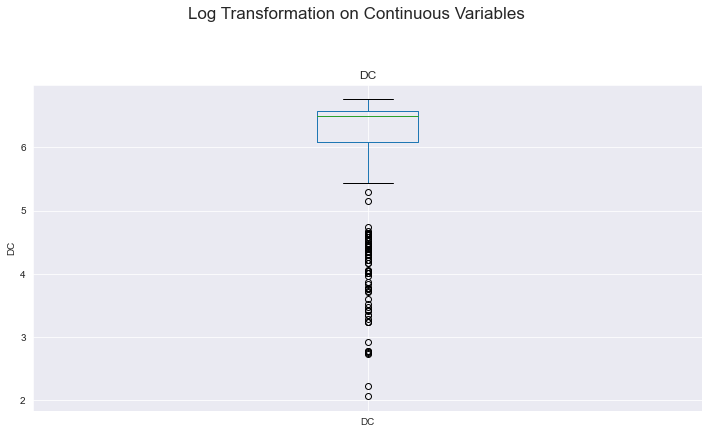

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



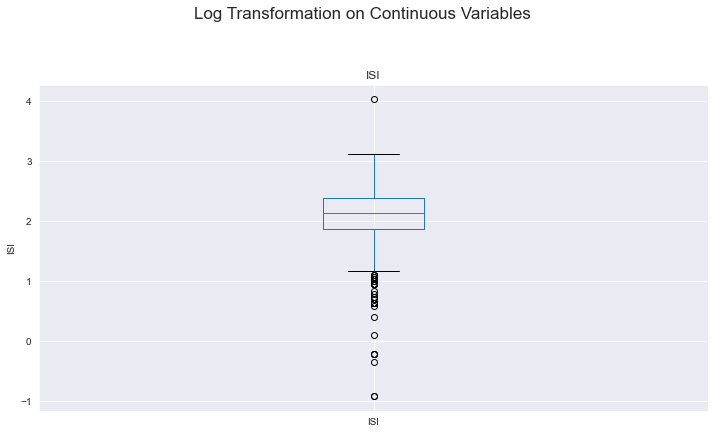

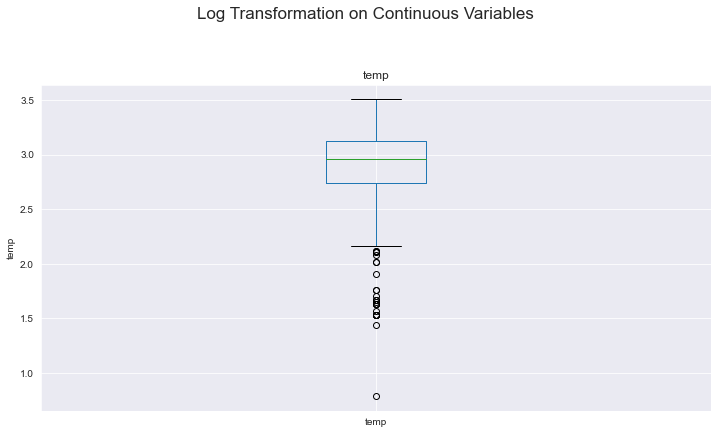

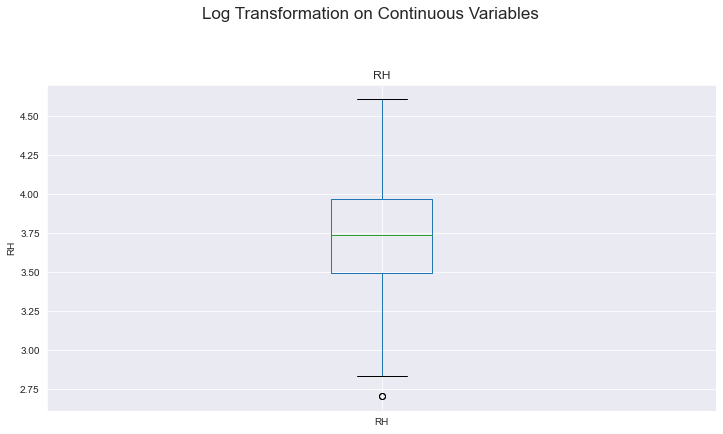

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning:

divide by zero encountered in log

C:\Users\admin\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning:

invalid value encountered in subtract

C:\Users\admin\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\admin\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\admin\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1270: RuntimeWarning:

invalid value encountered in less



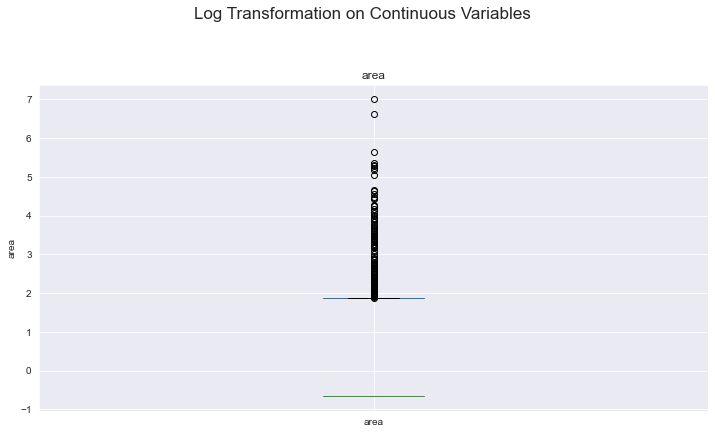

In [52]:
for feature in continuous_feature:
    data=forest_fires.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: Future

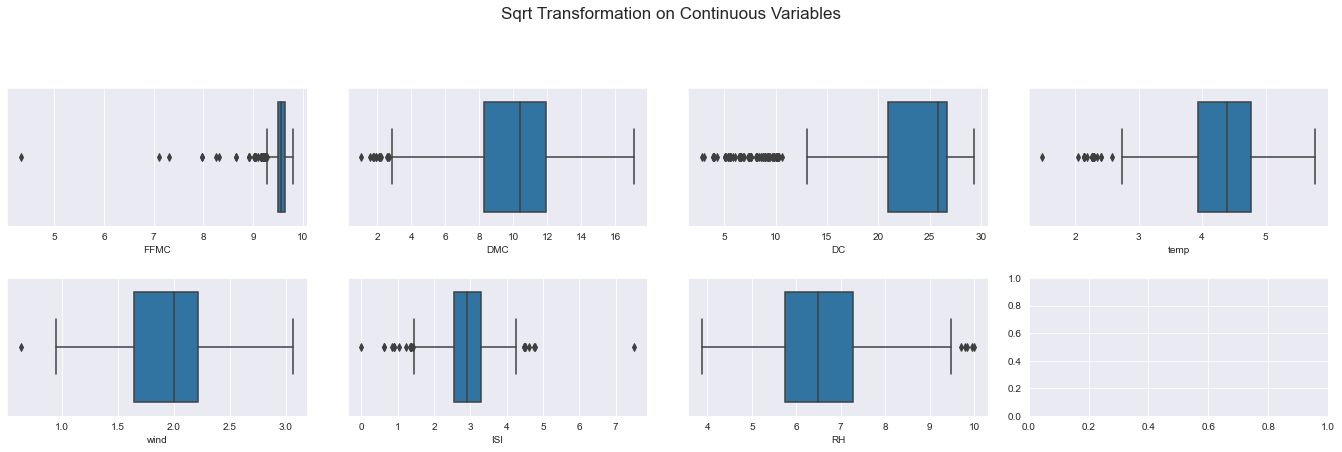

In [57]:
# Let's try to treat our outliers by sqrt tranformations:

fig, axes=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(forest_fires.FFMC), ax=axes[0,0])
sns.boxplot(np.sqrt(forest_fires.DMC), ax=axes[0,1])
sns.boxplot(np.sqrt(forest_fires.DC), ax=axes[0,2])
sns.boxplot(np.sqrt(forest_fires.temp), ax=axes[0,3])
sns.boxplot(np.sqrt(forest_fires.wind), ax=axes[1,0])
sns.boxplot(np.sqrt(forest_fires.ISI), ax=axes[1,1])
sns.boxplot(np.sqrt(forest_fires.RH), ax=axes[1,2])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: Future

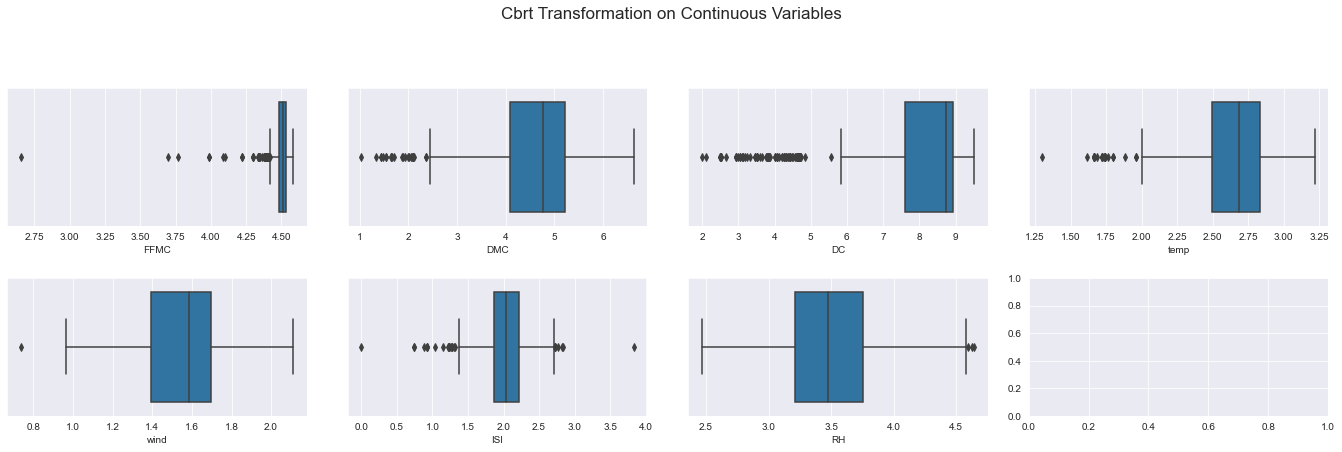

In [58]:
# Let's try to treat our outliers by cbrt tranformations:

fig, axes=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(forest_fires.FFMC), ax=axes[0,0])
sns.boxplot(np.cbrt(forest_fires.DMC), ax=axes[0,1])
sns.boxplot(np.cbrt(forest_fires.DC), ax=axes[0,2])
sns.boxplot(np.cbrt(forest_fires.temp), ax=axes[0,3])
sns.boxplot(np.cbrt(forest_fires.wind), ax=axes[1,0])
sns.boxplot(np.cbrt(forest_fires.ISI), ax=axes[1,1])
sns.boxplot(np.cbrt(forest_fires.RH), ax=axes[1,2])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

### 4.3 Visualize  distribution of 'Area' & taking insights:

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


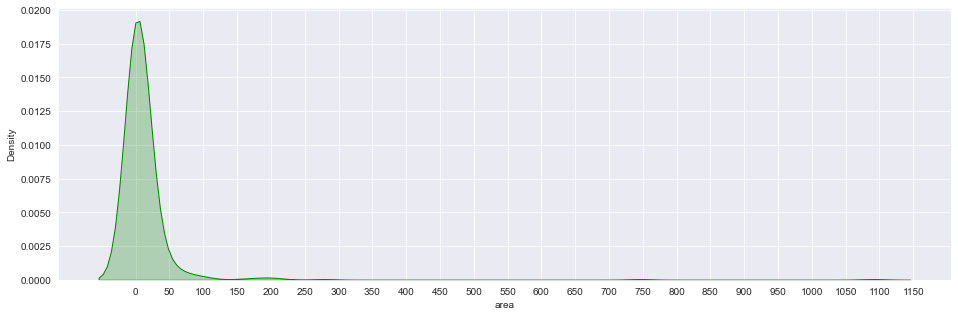

In [59]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(forest_fires['area'].skew()))
print("Kurtosis: {}".format(forest_fires['area'].kurtosis()))
ax = sns.kdeplot(forest_fires['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



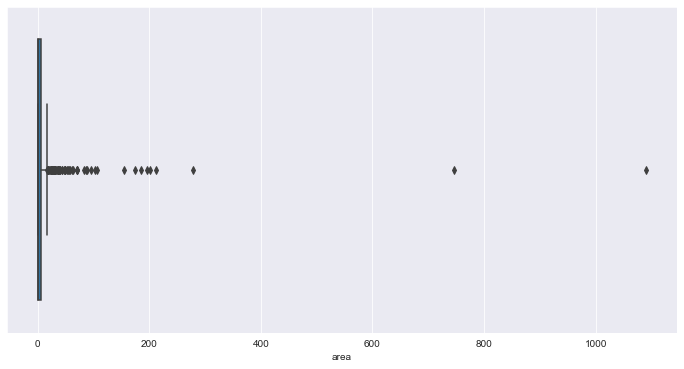

In [60]:
ax = sns.boxplot(forest_fires['area'])

**Observations:**
    
1. Data is highly skewed with a value of +12.84 and huge kurtosis value of 194.

2. It even tells you that majority of the forest fires do not cover a large area, most of damaged area is under 50 hectares of land.

3. We can apply tranformation to fix skewnesss and kurtosis, for that we will have to inverse transform before submitting the output.

**Outlier Check:** There are 4 outlier instances in our area columns but the questions is should we drop it or not? 
    (We will do outlier treatment)

### 4.4 Categorical Variables:

In [62]:
categorical_features=[feature for feature in forest_fires.columns if forest_fires[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
forest_fires[categorical_features].head()

Number of Categorical Features: 2 
 ['month', 'day']


month  day
0   mar  fri
1   oct  tue
2   oct  sat
3   mar  fri
4   mar  sun

In [64]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(forest_fires[feature].unique()),feature))

12 number of unique categories in feature named month
7 number of unique categories in feature named day


In [65]:
# Decide which categorical variables you want to use in model;

for feature in forest_fires.columns:
    if forest_fires[feature].dtypes == 'object':
        unique_cat = len(forest_fires[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(forest_fires[feature].value_counts())
        print()

Feature 'month' has 12 unique categories
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

Feature 'day' has 7 unique categories
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64



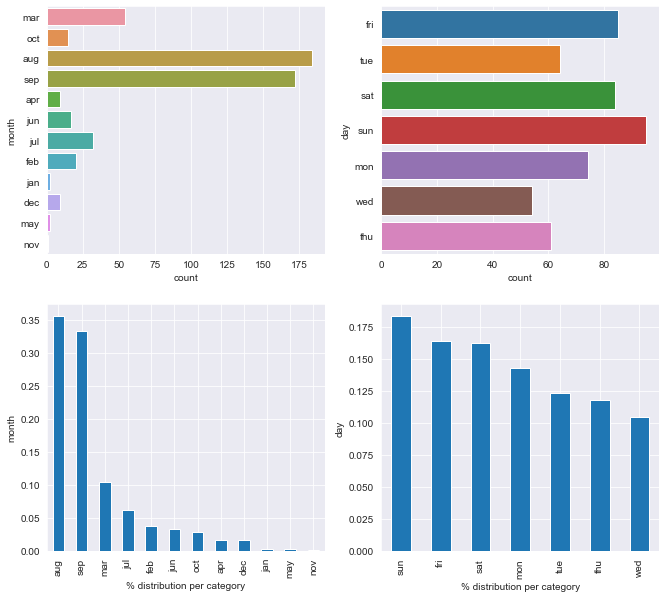

In [66]:
# Analyzing categorical columns:

plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data=forest_fires,y=col)
    plt.subplot(3,3,i+3)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

**Observations:**

1. Abnormally high number of the forest fires occured in the month of August and September.

2. In the case of day, the days from Friday to Monday have higher equal proportion of cases. 
   (However, no strong indicators) may be because of the weekend, animal throw some kind of cool party.

## Analyzing the relationship of categorical features w.r.t. the Target feature:

## Bivariate Analysis:

### 4.5 Bivariate Analysis for all variables in the dataset:

In [68]:
print(forest_fires['area'].describe(),'\n')

# A categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high

df=forest_fires.copy()
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 



month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0   

   daymon  daysat  daysun  ...  daywed  monthapr  monthaug  monthdec  \
0       0       0       0  ...       0         0         0         0   
1       0       0       0  ...       0         0         0         0   
2       0       1       0  ...       0         0         0         0   
3       0       0       0  ...       0         0         0         0   
4       0       0       1  ...       0         0         0         0   

   monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         1         0         0   

   monthoct  monthsep  size_category  damage_category  
0         0         0              1        No damage  
1         1         0              1        No damage  
2         1         0              1        No damage  
3         0         0              1        No damage  
4         0         0              1        No damage  

[5 rows x 32 columns]

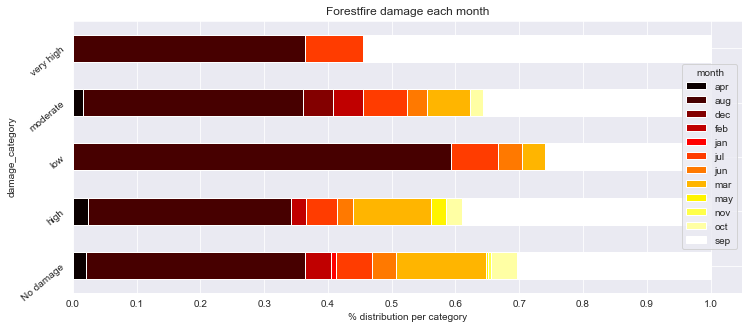

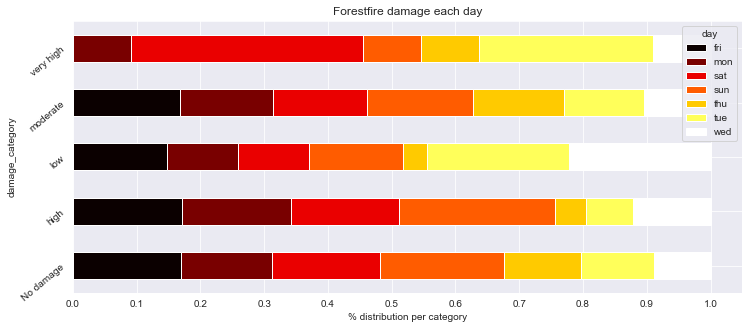

In [69]:
for col in categorical_features:
    
    if col!="size_category":
        cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
        cross.plot.barh(stacked=True,rot=40,cmap='hot',figsize=(12, 5))
        plt.xlabel('% distribution per category')
        plt.xticks(np.arange(0,1.1,0.1))
        plt.title("Forestfire damage each {}".format(col))
        
plt.show()

**From the above plot of month, we can understand few things;**

1. Most of the fires in August month were low (< 1 hectare).

2. The very high damages (>100 hectares) happened in only 3 months - August, Jan, and September.

3. Regarding fire damage per day, nothing much can be observed. Except that, there were no very high damaging fires on Friday and on Saturdays it has been reported most.

[Text(0.5, 1.0, 'Month Vs Temp Barplot'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Temperature')]

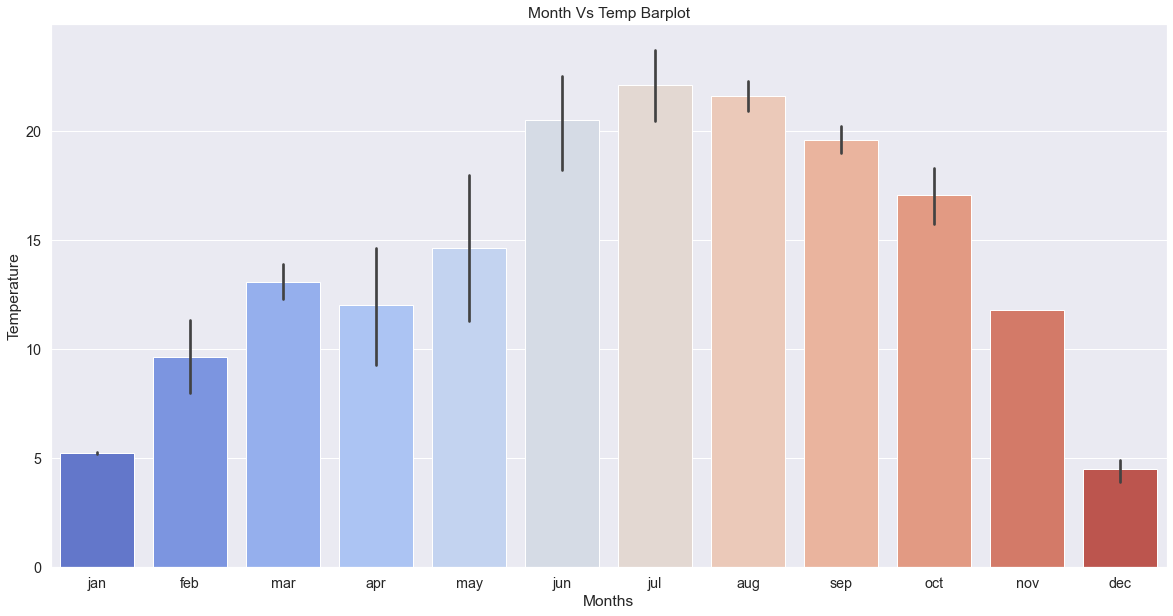

In [70]:
# Setting parameters:

plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = forest_fires,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'coolwarm');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature")

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a si

<AxesSubplot:xlabel='month', ylabel='day'>

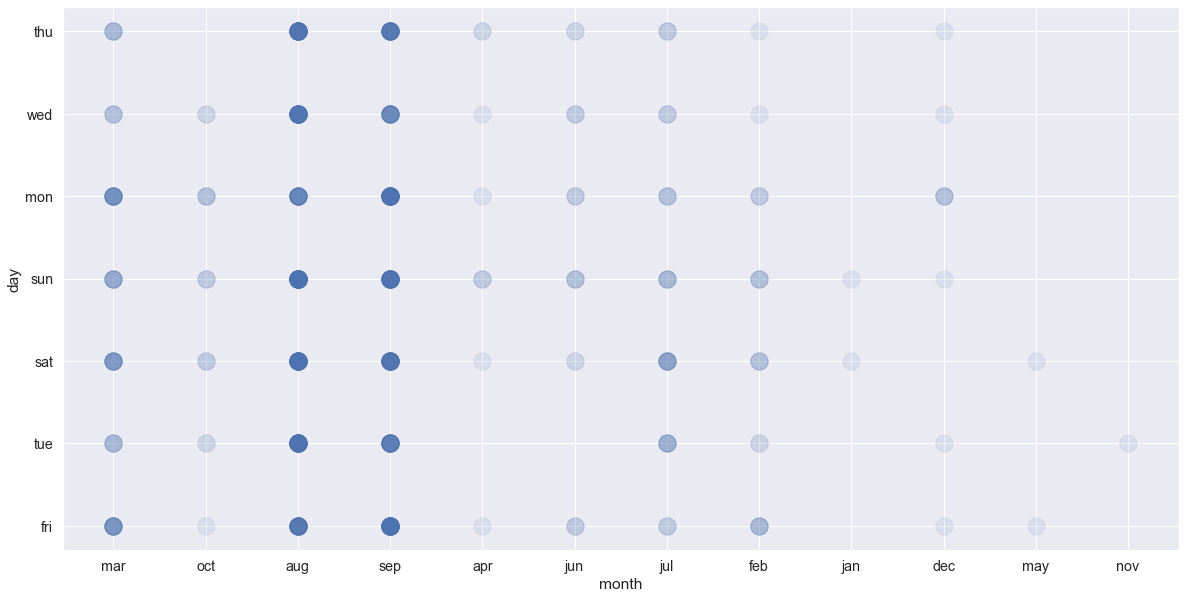

In [72]:
# Scatter plot for the dataset:

forest_fires.plot(kind='scatter', x='month', y='day', alpha=0.1, s=300) 

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a si

Text(0.5, 1.0, 'Burnt area in different regions of the park')

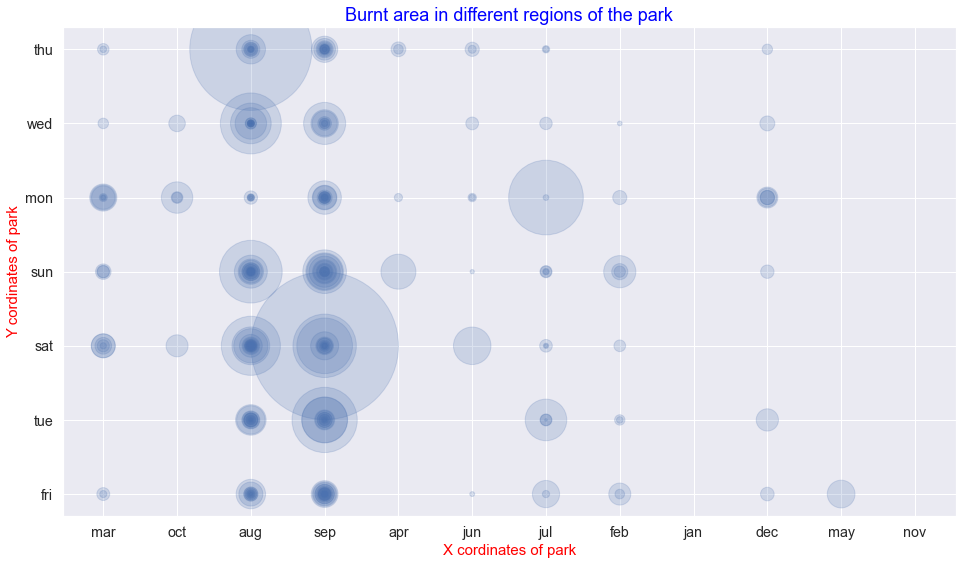

In [74]:
# Analysis of Burnt area based on spatial cordinates(month, day):

forest_fires.plot(kind='scatter', x='month', y='day', alpha=0.2, s=20*forest_fires['area'],figsize=(16,9))
plt.xlabel('X cordinates of park',color='red',fontsize=15)
plt.ylabel('Y cordinates of park',color='red',fontsize=15)
plt.title('Burnt area in different regions of the park',color='blue',fontsize=18)

**Observations:**
    
1. From the above scatter plot, we can see that there are multiple hotspots for burnt area.

2. The cordinates (6,5) show intense burnt area. By applying maximum and minimum function on area columns, we can deduce the min burned area is at (1,2) cordinates whereas max burned area is at (9,9) cordinates.

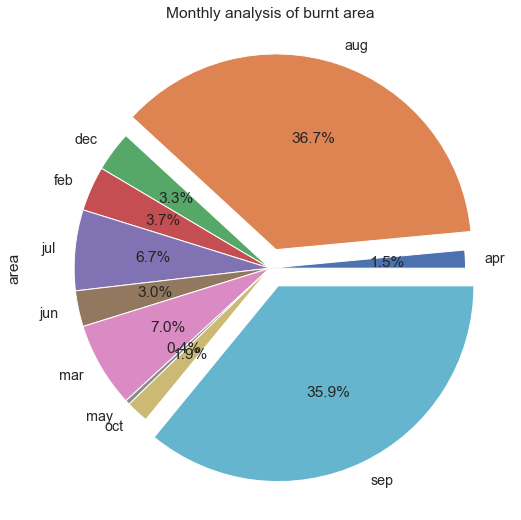

In [75]:
# Monthly analysis of burnt area, where the condition is: area>0

areaburnt=forest_fires[forest_fires['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.1,0,0,0,0,0,0,0,0.1],autopct='%0.1f%%')
plt.show()

### 4.6 Analysis of the response column:

In [79]:
forest_fires.size_category.unique()

array([1, 0])

In [80]:
countsizesmall = len(forest_fires[forest_fires.size_category == 'small'])
countsizelarge = len(forest_fires[forest_fires.size_category == 'large'])
print("Percentage of Small Forest Fire Size: {:.2f}%".format((countsizesmall / (len(forest_fires.size_category))*100)))
print("Percentage of Large Foreset Fire Size: {:.2f}%".format((countsizelarge / (len(forest_fires.size_category))*100)))

Percentage of Small Forest Fire Size: 0.00%
Percentage of Large Foreset Fire Size: 0.00%


In [81]:
forest_fires.size_category.value_counts()

1    378
0    139
Name: size_category, dtype: int64

Text(0.5, 1.0, 'Foeest Fire Size Category')

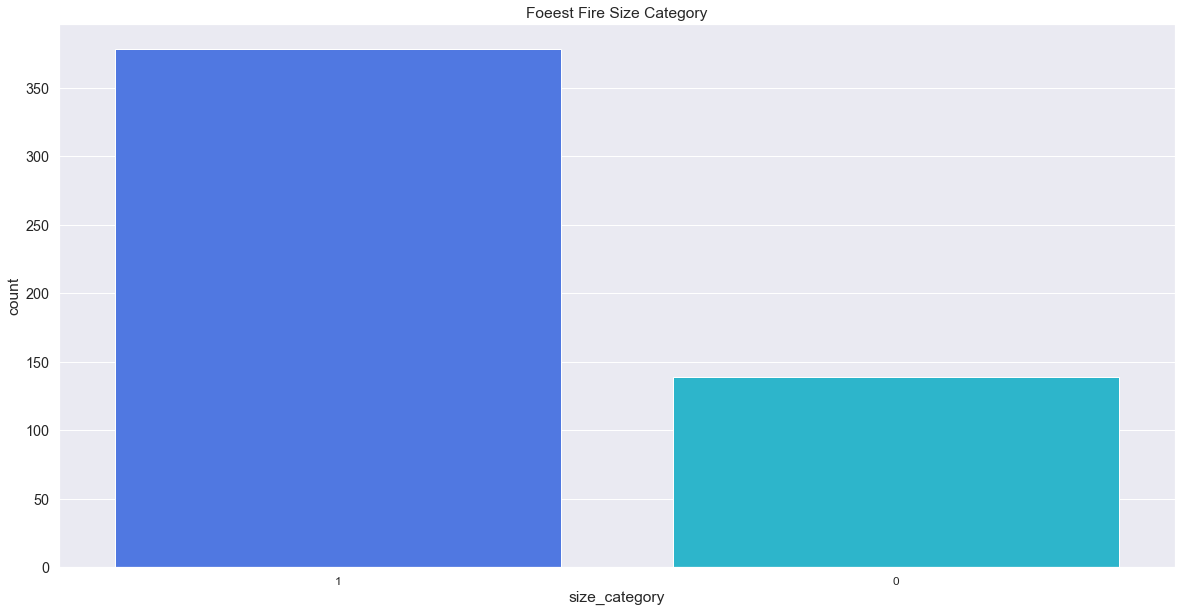

In [83]:
pal = sns.color_palette('rainbow')
sns.countplot(x='size_category', data=forest_fires, palette = pal, 
              order=forest_fires['size_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Foeest Fire Size Category')

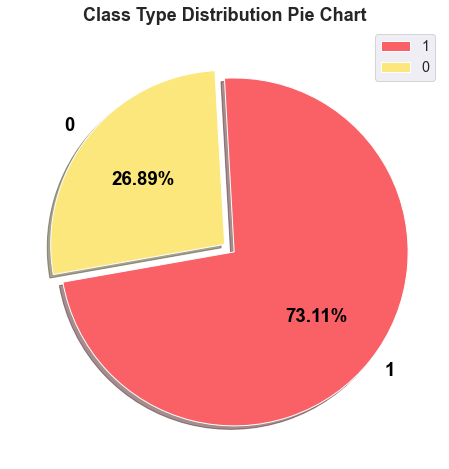

In [84]:
plt.figure(figsize = (12,8))
plt.pie(forest_fires['size_category'].value_counts(),
       labels=forest_fires.size_category.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

# 5. Data Pre-processing:

## 5.1. Feature Engineering:
    
Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores

**Applying Standard Scaler:**

In [85]:
continuous_feature=[feature for feature in forest_fires.columns if forest_fires[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 29


In [86]:
forest_fires[continuous_feature]

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  daymon  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1       0   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0       0   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0       0   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1       0   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0       0   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...     ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0       0   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0       0   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0       0   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0       0   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0       0   

     daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  monthdec  \
0         0       0       0       0       0         0         0         0   
1         0       0       0       1       0         0         0         0   
2         1       0       0       0       0         0         0         0   
3         0       0       0       0       0         0         0         0   
4         0       1       0       0       0         0         0         0   
..      ...     ...     ...     ...     ...       ...       ...       ...   
512       0       1       0       0       0         0         1         0   
513       0       1       0       0       0         0         1         0   
514       0       1       0       0       0         0         1         0   
515       1       0       0       0       0         0         1         0   
516       0       0       0       1       0         0         0         0   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0              1  
1           1         0              1  
2           1         0              1  
3           0         0              1  
4           0         0              1  
..        ...       ...            ...  
512         0         0              0  
513         0         0              0  
514         0         0              0  
515         0         0              1  
516         0         0              1  

[517 rows x 29 columns]

In [87]:
df_standard_scaled = forest_fires.copy()
features = df_standard_scaled[continuous_feature]

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [89]:
df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

month  day      FFMC       DMC        DC       ISI      temp        RH  \
0   mar  fri -0.805959 -1.323326 -1.830477 -0.860946 -1.842640  0.411724   
1   oct  tue -0.008102 -1.179541  0.488891 -0.509688 -0.153278 -0.692456   
2   oct  sat -0.008102 -1.049822  0.560715 -0.509688 -0.739383 -0.692456   
3   mar  fri  0.191362 -1.212361 -1.898266 -0.004756 -1.825402  3.233519   
4   mar  sun -0.243833 -0.931043 -1.798600  0.126966 -1.291012  3.356206   

       wind      rain     area    dayfri    daymon    daysat    daysun  \
0  1.498614 -0.073268 -0.20202  2.254407 -0.408709 -0.440449 -0.474467   
1 -1.741756 -0.073268 -0.20202 -0.443576 -0.408709 -0.440449 -0.474467   
2 -1.518282 -0.073268 -0.20202 -0.443576 -0.408709  2.270410 -0.474467   
3 -0.009834  0.603155 -0.20202  2.254407 -0.408709 -0.440449 -0.474467   
4 -1.238940 -0.073268 -0.20202 -0.443576 -0.408709 -0.440449  2.107630   

     daythu    daytue    daywed  monthapr  monthaug  monthdec  monthfeb  \
0 -0.365748 -0.375873 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603   
1 -0.365748  2.660475 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603   
2 -0.365748 -0.375873 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603   
3 -0.365748 -0.375873 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603   
4 -0.365748 -0.375873 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0 -0.062318 -0.256865 -0.184391  2.928152 -0.062318 -0.044023 -0.172860   
1 -0.062318 -0.256865 -0.184391 -0.341512 -0.062318 -0.044023  5.785038   
2 -0.062318 -0.256865 -0.184391 -0.341512 -0.062318 -0.044023  5.785038   
3 -0.062318 -0.256865 -0.184391  2.928152 -0.062318 -0.044023 -0.172860   
4 -0.062318 -0.256865 -0.184391  2.928152 -0.062318 -0.044023 -0.172860   

   monthsep  size_category  
0 -0.706081       0.606403  
1 -0.706081       0.606403  
2 -0.706081       0.606403  
3 -0.706081       0.606403  
4 -0.706081       0.606403

In [90]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 FFMC            -0.0
DMC              0.0
DC               0.0
ISI             -0.0
temp             0.0
RH               0.0
wind            -0.0
rain            -0.0
area            -0.0
dayfri           0.0
daymon          -0.0
daysat          -0.0
daysun          -0.0
daythu          -0.0
daytue           0.0
daywed          -0.0
monthapr        -0.0
monthaug         0.0
monthdec         0.0
monthfeb        -0.0
monthjan        -0.0
monthjul         0.0
monthjun         0.0
monthmar         0.0
monthmay        -0.0
monthnov         0.0
monthoct         0.0
monthsep         0.0
size_category   -0.0
dtype: float64 
Standard Devaition 
 FFMC             1.0
DMC              1.0
DC               1.0
ISI              1.0
temp             1.0
RH               1.0
wind             1.0
rain             1.0
area             1.0
dayfri           1.0
daymon           1.0
daysat           1.0
daysun           1.0
daythu           1.0
daytue           1.0
daywed           1.0
monthapr    

C:\Users\admin\AppData\Local\Temp/ipykernel_16512/441065470.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



### 5.2. Converting Categorical Variable into Label by using Get Dummies FeatureData Pre-Processing:

In [ ]:
# Converting string value into binary classes such as if "large" than classify it as '1' else 'O'

In [97]:
df['size_category'] = forest_fires.size_category
df['size_category'] = np.where(df['size_category'], 1, 0)
df.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0   

   daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  \
0       0       0       0       0       0       0         0         0   
1       0       0       0       0       1       0         0         0   
2       0       1       0       0       0       0         0         0   
3       0       0       0       0       0       0         0         0   
4       0       0       1       0       0       0         0         0   

   monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0         0         0         0         0         0         1         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         1         0   
4         0         0         0         0         0         1         0   

   monthnov  monthoct  monthsep  size_category  
0         0         0         0              1  
1         0         1         0              1  
2         0         1         0              1  
3         0         0         0              1  
4         0         0         0              1

In [98]:
df.size_category.unique()

array([1, 0])

# 6. Feature Selection Technique:

In [99]:
forest_fires.drop(['month','day','area'] ,axis=1, inplace= True)

In [100]:
data_ = forest_fires.copy()
data_.drop('size_category',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  dayfri  daymon  daysat  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0       1       0       0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0       0       0       0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0       0       0       1   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2       1       0       0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0       0       0       0   

   daysun  daythu  daytue  daywed  monthapr  monthaug  monthdec  monthfeb  \
0       0       0       0       0         0         0         0         0   
1       0       0       1       0         0         0         0         0   
2       0       0       0       0         0         0         0         0   
3       0       0       0       0         0         0         0         0   
4       1       0       0       0         0         0         0         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  
0         0         0         0         1         0         0         0  
1         0         0         0         0         0         0         1  
2         0         0         0         0         0         0         1  
3         0         0         0         1         0         0         0  
4         0         0         0         1         0         0         0

In [101]:
data_['size_category'] = df1.size_category
data_.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  dayfri  daymon  daysat  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0       1       0       0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0       0       0       0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0       0       0       1   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2       1       0       0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0       0       0       0   

   daysun  daythu  daytue  daywed  monthapr  monthaug  monthdec  monthfeb  \
0       0       0       0       0         0         0         0         0   
1       0       0       1       0         0         0         0         0   
2       0       0       0       0         0         0         0         0   
3       0       0       0       0         0         0         0         0   
4       1       0       0       0         0         0         0         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   size_category  
0              1  
1              1  
2              1  
3              1  
4              1

In [102]:
le = LabelEncoder()
le.fit(data_["size_category"])
data_["size_category"]=le.transform(data_["size_category"])
data_.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  dayfri  daymon  daysat  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0       1       0       0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0       0       0       0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0       0       0       1   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2       1       0       0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0       0       0       0   

   daysun  daythu  daytue  daywed  monthapr  monthaug  monthdec  monthfeb  \
0       0       0       0       0         0         0         0         0   
1       0       0       1       0         0         0         0         0   
2       0       0       0       0         0         0         0         0   
3       0       0       0       0         0         0         0         0   
4       1       0       0       0         0         0         0         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   size_category  
0              1  
1              1  
2              1  
3              1  
4              1

In [103]:
# split into input (X) and output (y) variables:

X = data_.drop('size_category', axis = 1)

y=  data_.size_category

In [104]:
# Feature importance:

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [105]:
# Feature extraction:

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [106]:
# Summarize scores:

scores = fit.scores_

features = fit.transform(X)

In [107]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

Score   Feature
1   23.006108       DMC
2   21.872657        DC
17  17.601210  monthdec
5    6.350054        RH
7    5.216072      rain
6    1.440661      wind
16   1.157358  monthaug
12   0.964276    daythu
21   0.738170  monthjun
19   0.735450  monthjan
10   0.706636    daysat
13   0.620080    daytue
22   0.597478  monthmar
23   0.543575  monthmay
24   0.367725  monthnov
14   0.217190    daywed
8    0.205497    dayfri
11   0.113897    daysun
15   0.099580  monthapr
18   0.098668  monthfeb
3    0.090542       ISI
0    0.084434      FFMC
9    0.055135    daymon
4    0.033386      temp
20   0.024995  monthjul
25   0.000367  monthoct

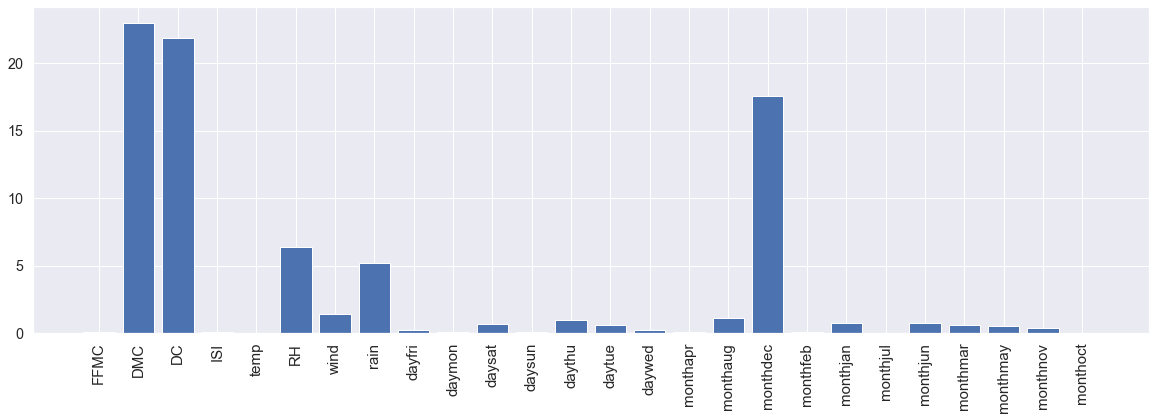

In [108]:
# [0,1,2,3,4,5,6,7,8]

fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks(range(len(scores)))
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

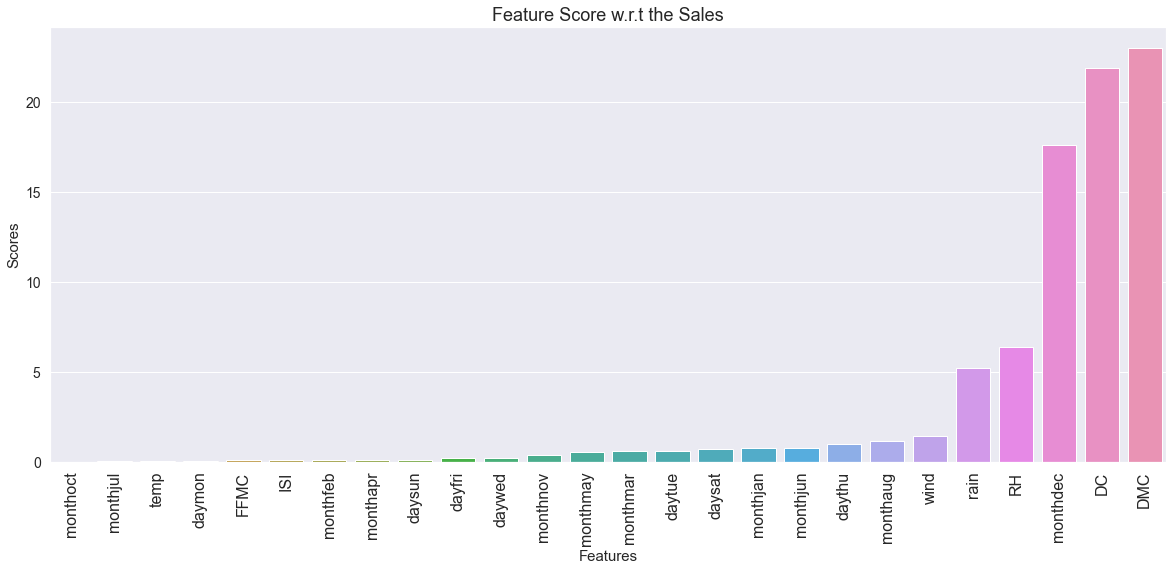

In [109]:
plt.figure(figsize=(20,8))

# Make barplot and sort bars:

sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)

# Set labels:

plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [112]:
model_data=df[['DMC','DC','RH','rain','wind','area','monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan',
       'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep','size_category']]
model_data

DMC     DC  RH  rain  wind   area  monthapr  monthaug  monthdec  \
0     26.2   94.3  51   0.0   6.7   0.00         0         0         0   
1     35.4  669.1  33   0.0   0.9   0.00         0         0         0   
2     43.7  686.9  33   0.0   1.3   0.00         0         0         0   
3     33.3   77.5  97   0.2   4.0   0.00         0         0         0   
4     51.3  102.2  99   0.0   1.8   0.00         0         0         0   
..     ...    ...  ..   ...   ...    ...       ...       ...       ...   
512   56.7  665.6  32   0.0   2.7   6.44         0         1         0   
513   56.7  665.6  71   0.0   5.8  54.29         0         1         0   
514   56.7  665.6  70   0.0   6.7  11.16         0         1         0   
515  146.0  614.7  42   0.0   4.0   0.00         0         1         0   
516    3.0  106.7  31   0.0   4.5   0.00         0         0         0   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0              1  
1           1         0              1  
2           1         0              1  
3           0         0              1  
4           0         0              1  
..        ...       ...            ...  
512         0         0              0  
513         0         0              0  
514         0         0              0  
515         0         0              1  
516         0         0              1  

[517 rows x 19 columns]

## 6.1 Test Train Split With Imbalanced Dataset:

In [113]:
x = model_data.drop('size_category',axis=1)
y = model_data[['size_category']]

In [114]:
# Splitting data into test data and train data:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3, stratify=y)

In [115]:
len(x_train.columns)

18

# 7. Hyperparameter Tuning:

## 7.1 Hyperparameter Tuning: Optimal Learning rate ,Number of Layers and Neurons

In [117]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [118]:
tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=5,  executions_per_trial=3,directory='project',project_name='Forest Fire')

In [119]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [120]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))

Trial 5 Complete [00h 00m 52s]
val_accuracy: 0.7649572491645813

Best val_accuracy So Far: 0.9935897390047709
Total elapsed time: 00h 04m 58s


Oracle triggered exit


## 7.2 Hyperparameter Tuning: Optimal Batch_size, Number of Epochs

In [122]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(64,input_dim=18,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(learning_rate=0.01)
    model1.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model1

In [134]:
model1 =KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [138]:
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=0.938 total time=   1.4s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=0.968 total time=   1.3s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.935 total time=   1.4s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=0.774 total time=   1.3s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.839 total time=   1.6s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ....batch_size=10, epochs=50;

5 out of the last 13 calls to <function Model.make_test_function.<locals>.test_function at 0x000001F12B1A0280> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


[CV 3/5; 5/16] END ....batch_size=20, epochs=10;, score=0.806 total time=   1.1s
[CV 4/5; 5/16] START batch_size=20, epochs=10...................................


5 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000001F1544C14C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


[CV 4/5; 5/16] END ....batch_size=20, epochs=10;, score=0.935 total time=   1.2s
[CV 5/5; 5/16] START batch_size=20, epochs=10...................................
[CV 5/5; 5/16] END ....batch_size=20, epochs=10;, score=0.839 total time=   1.2s
[CV 1/5; 6/16] START batch_size=20, epochs=50...................................
[CV 1/5; 6/16] END ....batch_size=20, epochs=50;, score=0.969 total time=   1.7s
[CV 2/5; 6/16] START batch_size=20, epochs=50...................................
[CV 2/5; 6/16] END ....batch_size=20, epochs=50;, score=0.935 total time=   2.6s
[CV 3/5; 6/16] START batch_size=20, epochs=50...................................
[CV 3/5; 6/16] END ....batch_size=20, epochs=50;, score=0.968 total time=   1.7s
[CV 4/5; 6/16] START batch_size=20, epochs=50...................................
[CV 4/5; 6/16] END ....batch_size=20, epochs=50;, score=0.806 total time=   1.7s
[CV 5/5; 6/16] START batch_size=20, epochs=50...................................
[CV 5/5; 6/16] END ....batch

In [143]:
print('Best {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9870967626571655, using {'batch_size': 20, 'epochs': 200}
0.8907257914543152,0.07267467538148384 with {'batch_size': 10, 'epochs': 10}
0.9548386931419373,0.04375696105607386 with {'batch_size': 10, 'epochs': 50}
0.96794353723526,0.020405775194027247 with {'batch_size': 10, 'epochs': 100}
0.9677419185638427,0.02040179074790949 with {'batch_size': 10, 'epochs': 200}
0.8844758033752441,0.05264993052530297 with {'batch_size': 20, 'epochs': 10}
0.9227822542190551,0.05998313596157057 with {'batch_size': 20, 'epochs': 50}
0.9612903118133544,0.024139721170542975 with {'batch_size': 20, 'epochs': 100}
0.9870967626571655,0.015803173759984957 with {'batch_size': 20, 'epochs': 200}
0.7816532254219055,0.056579634015837536 with {'batch_size': 40, 'epochs': 10}
0.9171370983123779,0.054875757968002085 with {'batch_size': 40, 'epochs': 50}
0.9614919185638428,0.03165002287999539 with {'batch_size': 40, 'epochs': 100}
0.9806451439857483,0.015803173759984957 with {'batch_size': 40, 'epochs': 200}
0

## 7.3 Hyperparameter Tuning: Optimal Droupout rate

In [135]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(64,input_dim=18,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(lr=0.01)
    model2.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model2

In [136]:
model2=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [137]:
grid_result2 = grid2.fit(x_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 1/5; 1/6] END .............dropout_rate=0.0;, score=0.969 total time=   4.6s
[CV 2/5; 1/6] START dropout_rate=0.0............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 2/5; 1/6] END .............dropout_rate=0.0;, score=1.000 total time=   6.3s
[CV 3/5; 1/6] START dropout_rate=0.0............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 3/5; 1/6] END .............dropout_rate=0.0;, score=0.968 total time=   5.0s
[CV 4/5; 1/6] START dropout_rate=0.0............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 4/5; 1/6] END .............dropout_rate=0.0;, score=0.903 total time=   4.2s
[CV 5/5; 1/6] START dropout_rate=0.0............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 5/5; 1/6] END .............dropout_rate=0.0;, score=0.968 total time=   4.8s
[CV 1/5; 2/6] START dropout_rate=0.1............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 1/5; 2/6] END .............dropout_rate=0.1;, score=1.000 total time=   4.8s
[CV 2/5; 2/6] START dropout_rate=0.1............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 2/5; 2/6] END .............dropout_rate=0.1;, score=1.000 total time=   4.4s
[CV 3/5; 2/6] START dropout_rate=0.1............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 3/5; 2/6] END .............dropout_rate=0.1;, score=0.710 total time=   4.2s
[CV 4/5; 2/6] START dropout_rate=0.1............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 4/5; 2/6] END .............dropout_rate=0.1;, score=0.968 total time=   4.4s
[CV 5/5; 2/6] START dropout_rate=0.1............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 5/5; 2/6] END .............dropout_rate=0.1;, score=0.968 total time=   4.2s
[CV 1/5; 3/6] START dropout_rate=0.2............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 1/5; 3/6] END .............dropout_rate=0.2;, score=0.906 total time=   4.8s
[CV 2/5; 3/6] START dropout_rate=0.2............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 2/5; 3/6] END .............dropout_rate=0.2;, score=1.000 total time=   4.4s
[CV 3/5; 3/6] START dropout_rate=0.2............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 3/5; 3/6] END .............dropout_rate=0.2;, score=0.968 total time=   3.8s
[CV 4/5; 3/6] START dropout_rate=0.2............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 4/5; 3/6] END .............dropout_rate=0.2;, score=0.968 total time=   4.4s
[CV 5/5; 3/6] START dropout_rate=0.2............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 5/5; 3/6] END .............dropout_rate=0.2;, score=0.968 total time=   4.7s
[CV 1/5; 4/6] START dropout_rate=0.3............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 1/5; 4/6] END .............dropout_rate=0.3;, score=0.969 total time=   4.4s
[CV 2/5; 4/6] START dropout_rate=0.3............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 2/5; 4/6] END .............dropout_rate=0.3;, score=0.968 total time=   3.8s
[CV 3/5; 4/6] START dropout_rate=0.3............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 3/5; 4/6] END .............dropout_rate=0.3;, score=0.968 total time=   3.9s
[CV 4/5; 4/6] START dropout_rate=0.3............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 4/5; 4/6] END .............dropout_rate=0.3;, score=0.710 total time=   4.7s
[CV 5/5; 4/6] START dropout_rate=0.3............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 5/5; 4/6] END .............dropout_rate=0.3;, score=1.000 total time=   4.5s
[CV 1/5; 5/6] START dropout_rate=0.4............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 1/5; 5/6] END .............dropout_rate=0.4;, score=0.969 total time=   3.9s
[CV 2/5; 5/6] START dropout_rate=0.4............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 2/5; 5/6] END .............dropout_rate=0.4;, score=1.000 total time=   3.7s
[CV 3/5; 5/6] START dropout_rate=0.4............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 3/5; 5/6] END .............dropout_rate=0.4;, score=0.968 total time=   4.3s
[CV 4/5; 5/6] START dropout_rate=0.4............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 4/5; 5/6] END .............dropout_rate=0.4;, score=0.968 total time=   4.4s
[CV 5/5; 5/6] START dropout_rate=0.4............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 5/5; 5/6] END .............dropout_rate=0.4;, score=1.000 total time=   4.0s
[CV 1/5; 6/6] START dropout_rate=0.5............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 1/5; 6/6] END .............dropout_rate=0.5;, score=0.906 total time=   3.7s
[CV 2/5; 6/6] START dropout_rate=0.5............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 2/5; 6/6] END .............dropout_rate=0.5;, score=1.000 total time=   4.6s
[CV 3/5; 6/6] START dropout_rate=0.5............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 3/5; 6/6] END .............dropout_rate=0.5;, score=0.968 total time=   3.8s
[CV 4/5; 6/6] START dropout_rate=0.5............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 4/5; 6/6] END .............dropout_rate=0.5;, score=0.935 total time=   4.7s
[CV 5/5; 6/6] START dropout_rate=0.5............................................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 5/5; 6/6] END .............dropout_rate=0.5;, score=0.968 total time=   3.7s


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [139]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9808467626571655, using {'dropout_rate': 0.4}
0.9614919185638428,0.03165002287999539 with {'dropout_rate': 0.0}
0.9290322422981262,0.11062212176688883 with {'dropout_rate': 0.1}
0.9618951439857483,0.030498904904173816 with {'dropout_rate': 0.2}
0.9227822422981262,0.107267920894063 with {'dropout_rate': 0.3}
0.9808467626571655,0.015642884455970583 with {'dropout_rate': 0.4}
0.95544353723526,0.03195675346700096 with {'dropout_rate': 0.5}


## 7.4 Hyperparameter Tuning: Optimal Activation Function and Kernel Initializer

In [140]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(64,input_dim=18,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.0))
    model3.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(lr=0.01)
    model3.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model3

In [141]:
model3=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

In [142]:
grid_result3 = grid3.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=1.000 total time=   3.8s
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=1.000 total time=   4.1s
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=0.968 total time=   4.2s
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=0.903 total time=   4.8s
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=0.968 total time=   3.7s
[CV 1/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 1/5; 2/9] END activation_function=softmax, init=uniform;, score=0.938 total time=   4.0s
[CV 2/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 2/5; 2/9] END activation_function=softmax, init=uniform;, score=1.000 total time=   4.5s
[CV 3/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 3/5; 2/9] END activation_function=softmax, init=uniform;, score=0.742 total time=   4.0s
[CV 4/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 4/5; 2/9] END activation_function=softmax, init=uniform;, score=0.968 total time=   4.1s
[CV 5/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 5/5; 2/9] END activation_function=softmax, init=uniform;, score=0.968 total time=   3.9s
[CV 1/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 1/5; 3/9] END activation_function=softmax, init=zero;, score=1.000 total time=   4.8s
[CV 2/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 2/5; 3/9] END activation_function=softmax, init=zero;, score=1.000 total time=   4.2s
[CV 3/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 3/5; 3/9] END activation_function=softmax, init=zero;, score=0.968 total time=   4.3s
[CV 4/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 4/5; 3/9] END activation_function=softmax, init=zero;, score=0.968 total time=   4.5s
[CV 5/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 5/5; 3/9] END activation_function=softmax, init=zero;, score=1.000 total time=   4.6s
[CV 1/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 1/5; 4/9] END activation_function=tanh, init=normal;, score=1.000 total time=   4.0s
[CV 2/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 2/5; 4/9] END activation_function=tanh, init=normal;, score=1.000 total time=   4.0s
[CV 3/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 3/5; 4/9] END activation_function=tanh, init=normal;, score=0.968 total time=   4.1s
[CV 4/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 4/5; 4/9] END activation_function=tanh, init=normal;, score=0.935 total time=   3.6s
[CV 5/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 5/5; 4/9] END activation_function=tanh, init=normal;, score=0.935 total time=   3.6s
[CV 1/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 1/5; 5/9] END activation_function=tanh, init=uniform;, score=1.000 total time=   3.6s
[CV 2/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 2/5; 5/9] END activation_function=tanh, init=uniform;, score=0.935 total time=   3.8s
[CV 3/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 3/5; 5/9] END activation_function=tanh, init=uniform;, score=0.968 total time=   3.7s
[CV 4/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 4/5; 5/9] END activation_function=tanh, init=uniform;, score=0.935 total time=   3.7s
[CV 5/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 5/5; 5/9] END activation_function=tanh, init=uniform;, score=1.000 total time=   3.5s
[CV 1/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 1/5; 6/9] END activation_function=tanh, init=zero;, score=1.000 total time=   3.6s
[CV 2/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 2/5; 6/9] END activation_function=tanh, init=zero;, score=0.935 total time=   4.2s
[CV 3/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 3/5; 6/9] END activation_function=tanh, init=zero;, score=0.968 total time=   3.5s
[CV 4/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 4/5; 6/9] END activation_function=tanh, init=zero;, score=1.000 total time=   3.7s
[CV 5/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 5/5; 6/9] END activation_function=tanh, init=zero;, score=1.000 total time=   3.6s
[CV 1/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 1/5; 7/9] END activation_function=relu, init=normal;, score=0.969 total time=   3.9s
[CV 2/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 2/5; 7/9] END activation_function=relu, init=normal;, score=0.968 total time=   4.4s
[CV 3/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 3/5; 7/9] END activation_function=relu, init=normal;, score=0.968 total time=   3.6s
[CV 4/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 4/5; 7/9] END activation_function=relu, init=normal;, score=0.903 total time=   3.6s
[CV 5/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 5/5; 7/9] END activation_function=relu, init=normal;, score=0.968 total time=   3.9s
[CV 1/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 1/5; 8/9] END activation_function=relu, init=uniform;, score=1.000 total time=   3.6s
[CV 2/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 2/5; 8/9] END activation_function=relu, init=uniform;, score=1.000 total time=   3.6s
[CV 3/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 3/5; 8/9] END activation_function=relu, init=uniform;, score=0.968 total time=   3.5s
[CV 4/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 4/5; 8/9] END activation_function=relu, init=uniform;, score=0.968 total time=   3.9s
[CV 5/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 5/5; 8/9] END activation_function=relu, init=uniform;, score=1.000 total time=   3.7s
[CV 1/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 1/5; 9/9] END activation_function=relu, init=zero;, score=1.000 total time=   3.4s
[CV 2/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 2/5; 9/9] END activation_function=relu, init=zero;, score=1.000 total time=   3.5s
[CV 3/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 3/5; 9/9] END activation_function=relu, init=zero;, score=0.968 total time=   3.7s
[CV 4/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 4/5; 9/9] END activation_function=relu, init=zero;, score=0.935 total time=   3.7s
[CV 5/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 5/5; 9/9] END activation_function=relu, init=zero;, score=0.968 total time=   3.5s


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

# 8. Building Neural Networks Model using Optimal Values:

### Initialising the ANN:

In [148]:
def toFindBestParams(x_train, y_train, x_test, y_test):
    # Print(y_test.shape)
    # sys.exit()
    
    # defining list of hyperparameters:
    
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
           
    # initializing the trials:
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # Createing ANN model:
            model = Sequential()
            # Defining the first layer of the model:
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))
            
            # Defining the Second layer of the model:
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node, since we will be predicting a single number:
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
 
            # Fitting the ANN to the Training set:
            model_trained = model.fit(x_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)
               
             # Fetching the accuracy of the training:
            Accuracy_train = model_trained.history['accuracy'][-1]   
            
            # Printing the results of the current iteration:
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
toFindBestParams(x_train, y_train, x_test, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.9390581846237183
batch_size: 5 - epochs: 10 Accuracy: 0.9445983171463013
batch_size: 5 - epochs: 50 Accuracy: 0.9778393507003784
batch_size: 5 - epochs: 100 Accuracy: 0.9750692248344421
batch_size: 10 - epochs: 5 Accuracy: 0.761772871017456
batch_size: 10 - epochs: 10 Accuracy: 0.9722991585731506
batch_size: 10 - epochs: 50 Accuracy: 0.9778393507003784
batch_size: 10 - epochs: 100 Accuracy: 0.9806094169616699
batch_size: 15 - epochs: 5 Accuracy: 0.8310249447822571
batch_size: 15 - epochs: 10 Accuracy: 0.9556786417961121
batch_size: 15 - epochs: 50 Accuracy: 0.9667590260505676
batch_size: 15 - epochs: 100 Accuracy: 0.9861496090888977
batch_size: 20 - epochs: 5 Accuracy: 0.742382287979126
batch_size: 20 - epochs: 10 Accuracy: 0.8947368264198303
batch_size: 20 - epochs: 50 Accuracy: 0.9750692248344421
batch_size: 20 - epochs: 100 Accuracy: 0.9778393507003784


#### Training Model - using best params:

In [151]:
 # Creating ANN model:
    
model = Sequential()

# Defining first layer of the model:

model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))
model.add(Dropout(0.1))

# Defining Second layer of the model:

model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 model.add(Dropout(0.1)) 
    
# Output neuron is a single fully connected node, since we will be predicting a single number:

model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training model with best parameters:

history = model.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
25/25 [==============================] - 2s 18ms/step - loss: 0.6832 - accuracy: 0.5809 - val_loss: 0.6459 - val_accuracy: 0.7917
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6527 - accuracy: 0.7012 - val_loss: 0.6099 - val_accuracy: 0.7917
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6326 - accuracy: 0.7012 - val_loss: 0.5832 - val_accuracy: 0.7917
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6127 - accuracy: 0.7095 - val_loss: 0.5668 - val_accuracy: 0.7917
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5898 - accuracy: 0.7137 - val_loss: 0.5414 - val_accuracy: 0.8000
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.5448 - accuracy: 0.8008 - val_loss: 0.4955 - val_accuracy: 0.8500
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4717 - accuracy: 0.9004 - val_loss: 0.4361 - val_accuracy: 0.9000
Epoch 8/100


## 8.1 Model Evaluation Train and Test Error:

In [152]:
# Evaluate the model:

scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9845
accuracy: 98.45%


In [153]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Compare the train-set and test-set accuracy:**
    
1. We will compare the train-set and test-set accuracy to check for overfitting.

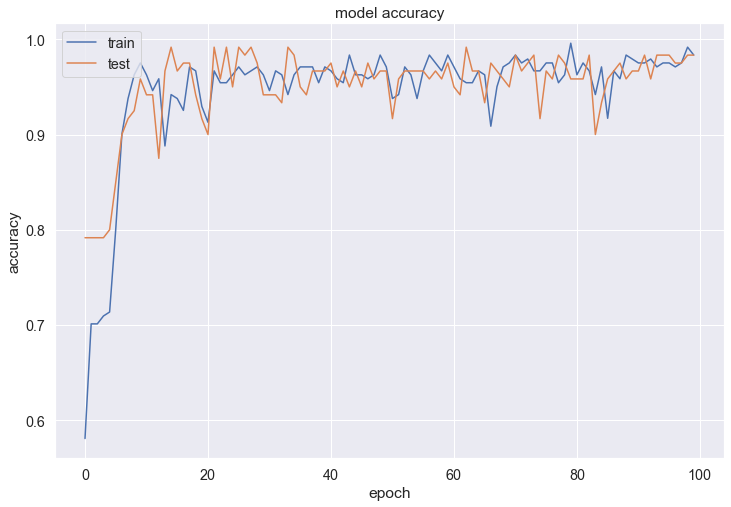

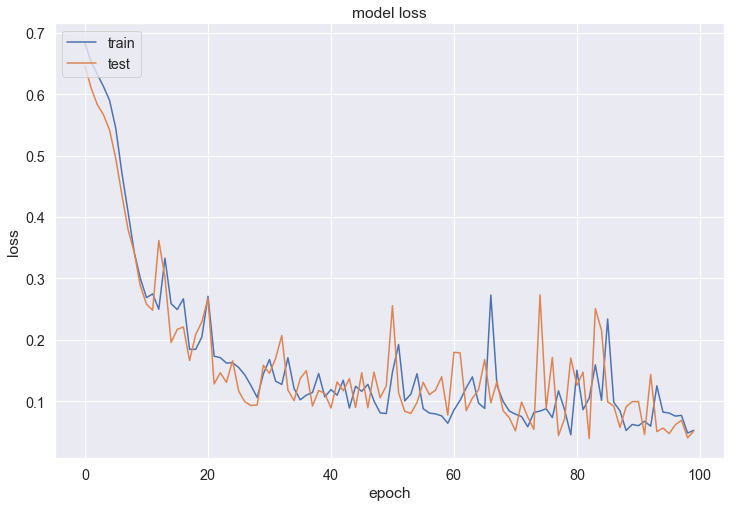

In [154]:
## Check for overfitting and underfitting:

# Summarize history for accuracy:

plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss:

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**OBSERVATIONS:**

1. The training-error converged but the testing error didn't converge and conincide with the training error.
2. Therefore, We will do better with Hyperparameter Tuning all the parameters which is computationally Expensive.

## 8.2 Predicting values from Model using same dataset:

In [155]:
# Generating predictions for test data:

y_predict_test = model.predict(x_test) 

# Creating table with test price & predicted price for test:

test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test.size_category
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# Converting the probability of target variable to binary class of test data:

test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

5/5 [==============================] - 0s 5ms/step
(156, 3)


Test_Actual  Test_Probability  Test_Predicted
259            1          0.991860               1
273            0          0.059569               0
314            1          0.991743               1
78             1          0.992878               1
95             1          0.992254               1
395            0          0.011055               0
408            0          0.024338               0
89             1          0.993478               1
478            1          0.991588               1
426            1          0.992375               1

In [156]:
# Generating predictions for train data:

y_predict_train = model.predict(x_train)

# Creating table with test price & predicted price for test:

train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train.size_category
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

12/12 [==============================] - 0s 2ms/step
(361, 3)


Train_Actual  Train_Probability  Train_Predicted
346             0           0.014032                0
67              1           0.992144                1
0               1           0.993790                1
493             0           0.013979                0
402             1           0.992204                1
22              1           0.993255                1
205             0           0.014517                0
414             1           0.992432                1
510             1           0.992482                1
54              1           0.992274                1

## 8.3 Classification Report:

In [157]:
# Print the classification report:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score for Test Data    = ", np.round(accuracy_score(test_prediction['Test_Actual'],test_prediction['Test_Predicted']),2)*100,"%")
print("Confusion Matrix for Test Data  =\n", confusion_matrix(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))
print("Classification Report for Test Data  =\n", classification_report(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))

Accuracy score for Test Data    =  99.0 %
Confusion Matrix for Test Data  =
 [[ 42   0]
 [  1 113]]
Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.99      1.00       114

    accuracy                           0.99       156
   macro avg       0.99      1.00      0.99       156
weighted avg       0.99      0.99      0.99       156



In [158]:
# Print the classification report:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score for Train Data    = ", np.round(accuracy_score(train_prediction['Train_Actual'],train_prediction['Train_Predicted']),2)*100,"%")
print("Confusion Matrix for Train Data  =\n", confusion_matrix(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))
print("Classification Report for Train Data  =\n", classification_report(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))

Accuracy score for Train Data    =  98.0 %
Confusion Matrix for Train Data  =
 [[ 97   0]
 [  7 257]]
Classification Report for Train Data  =
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        97
           1       1.00      0.97      0.99       264

    accuracy                           0.98       361
   macro avg       0.97      0.99      0.98       361
weighted avg       0.98      0.98      0.98       361



In [159]:
# Print the scores on training and test set:

y_predict_test = model.predict(x_test) 
y_predict_train = model.predict(x_train)
print('Training set score: {:.2f}%'.format(accuracy_score(train_prediction['Train_Actual'], train_prediction['Train_Predicted'])*100))

print('Test set score: {:.2f}%'.format(accuracy_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])*100))

12/12 [==============================] - 0s 2ms/step
Training set score: 98.06%
Test set score: 99.36%


## 8.4 Confusion matrix:

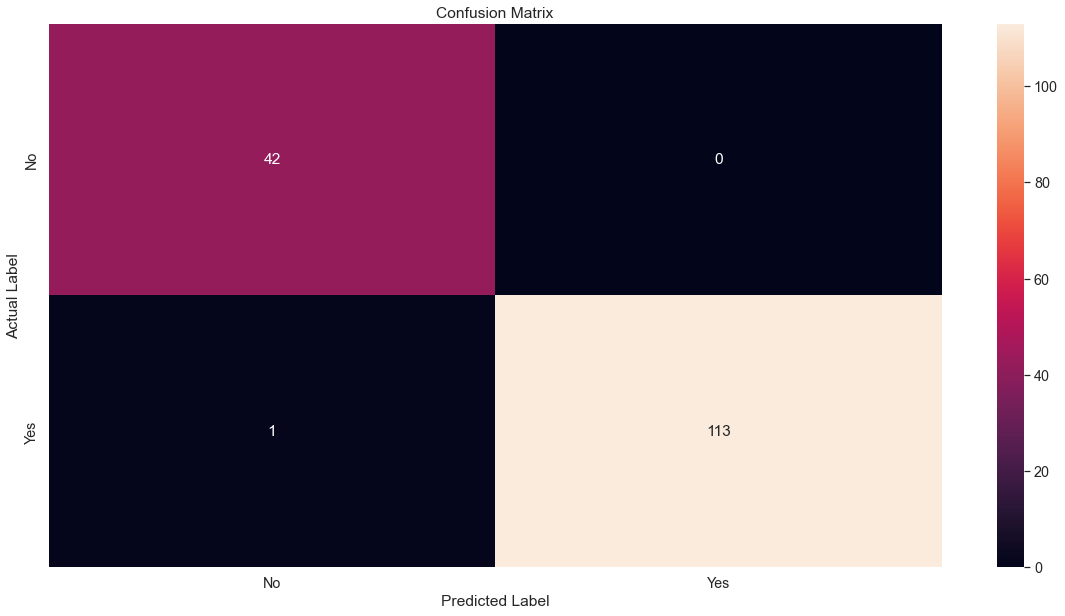

In [160]:
# Plot confusion matrix to describe the performance of classifier:

cm_df=confusion_matrix(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

## 8.5 ROC - AUC Curve:

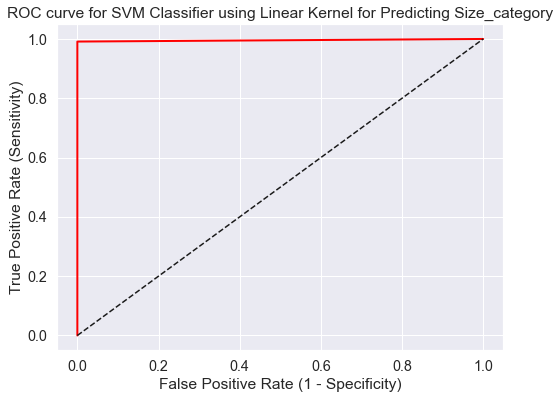

ROC AUC : 0.9956


In [161]:
fpr, tpr, thresholds = roc_curve(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])

plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC_AUC = roc_auc_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])

print('ROC AUC : {:.4f}'.format(ROC_AUC))

Text(0, 0.5, 'Frequency')

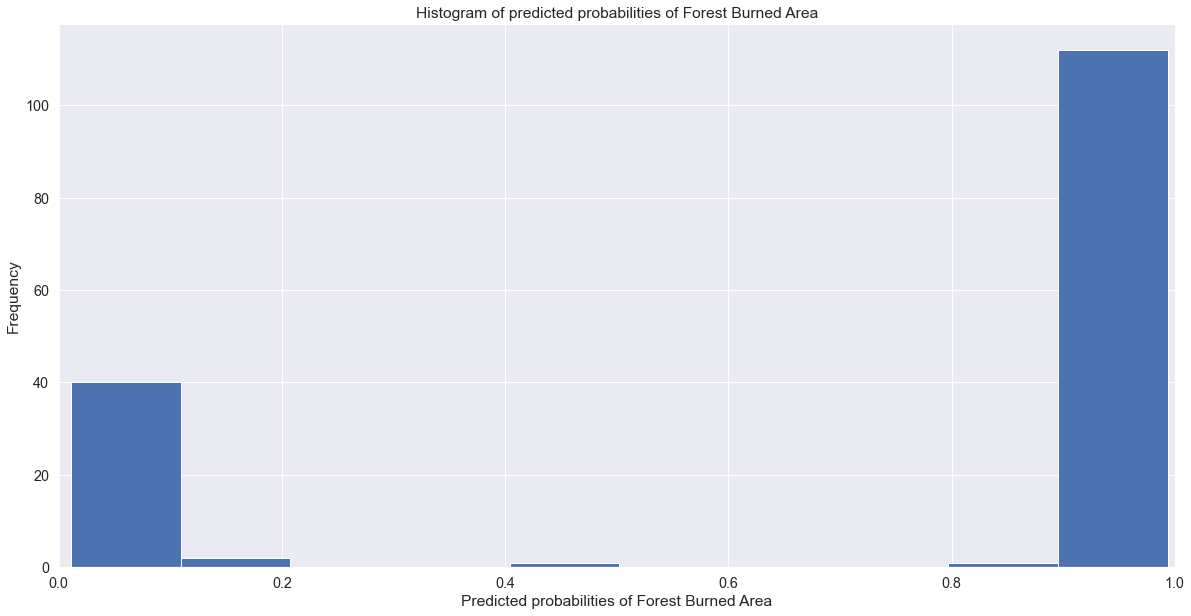

In [162]:
# Plot histogram of predicted probabilities, adjust the font size:

plt.rcParams['font.size'] = 12


# Plot histogram with 10 bins:
plt.hist(test_prediction['Test_Probability'], bins = 10)


# Set the title of predicted probabilities:
plt.title('Histogram of predicted probabilities of Forest Burned Area')


# Set the x-axis limit:
plt.xlim(0,1)


# Set the title:
plt.xlabel('Predicted probabilities of Forest Burned Area')
plt.ylabel('Frequency')